In [27]:
import pandas as pd
import numpy as np
import copy
import time
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from tqdm.notebook import tqdm_notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Conv1D, RepeatVector, Flatten, Dense, Input, Reshape, Layer, Dropout, Activation, MultiHeadAttention
from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

from tensorflow_addons.optimizers import AdamW

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

import networkx as nx
from networkx.algorithms import bipartite
from sklearn import decomposition

In [2]:
percent = 10
base_path = '/home/suraj/Desktop/TPMCF/{}'
# data_org = np.load(base_path.format('rtdata_full_O.npy'))
# data_org_indicator = copy.deepcopy(data_org)
# data_org_indicator[np.where(data_org_indicator>0)] = 1

# data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent)))
# data_train_indicator = copy.deepcopy(data_train)
# data_train_indicator[np.where(data_train_indicator>0)] = 1

# outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
# outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
# outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
# outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
# outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))

# data_org.shape, data_train.shape, data_train_indicator.shape, outlier2.shape

In [3]:
# percent = 10
# base_path = '/home/suraj/Desktop/www2023/dataset2/setup2/{}'
# data_org = np.load(base_path.format('tpdata_full_O.npy'))
# data_org_indicator = copy.deepcopy(data_org)
# data_org_indicator[np.where(data_org_indicator>0)] = 1

# data_train = np.load(base_path.format('tpdata_{}.npy'.format(percent)))
# data_train_indicator = copy.deepcopy(data_train)
# data_train_indicator[np.where(data_train_indicator>0)] = 1

# outlier2 = np.load(base_path.format('tp_outlier_{}.npy'.format(2)))
# outlier4 = np.load(base_path.format('tp_outlier_{}.npy'.format(4)))
# outlier6 = np.load(base_path.format('tp_outlier_{}.npy'.format(6)))
# outlier8 = np.load(base_path.format('tp_outlier_{}.npy'.format(8)))
# outlier10 = np.load(base_path.format('tp_outlier_{}.npy'.format(10)))

# data_org.shape, data_train.shape, data_train_indicator.shape, outlier2.shape

In [4]:
# for i in range(data_train.shape[0]):
#     for j in range(data_train.shape[1]):
#         for k in range(63):
#             data_train[i][j][k] = data_org_indicator[i][j][k]

In [5]:
# data_train_indicator = copy.deepcopy(data_train)
# data_train_indicator[np.where(data_train_indicator>0)] = 1

In [6]:
# for i in range(data_train_indicator.shape[0]):
#     for j in range(data_train_indicator.shape[1]):
#         for k in range(data_train_indicator.shape[2]):
#             if data_train_indicator[i][j][-1]==0:
#                 data_train[i][j][k] = 0  

In [7]:
# for k in range(data_train_indicator.shape[2]):
#     temp = data_train[:,:,k]
#     print(np.count_nonzero(temp)/(142*4500))

In [8]:
# data_train_indicator = copy.deepcopy(data_train)
# data_train_indicator[np.where(data_train_indicator>0)] = 1

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

temp = data_org[:,:,-1]
l = []
for i in range(temp.shape[-1]):
    count = np.count_nonzero(temp[:,i])
    l.append(count)
    #print(count)
    
max_item = max(l)
max_ind = l.index(max_item)
user_rt = temp[:,max_ind] #service index 1750

df = pd.DataFrame(user_rt)
ax = plt.axes()
ax.set_facecolor("white")

plt.rcParams.update({'font.size': 14})

plt.plot(df, marker='o')
plt.xlabel('Users')
plt.ylabel('Response Time (sec)')
plt.savefig("Serv1750_time63.pdf", format="pdf", bbox_inches="tight")
plt.show()

NameError: name 'data_org' is not defined

In [10]:
# users_serv_count = np.zeros((142))
# for k in range(data_org.shape[-1]):
#     temp = data_org[:,:,k]
#     for i in range(temp.shape[0]):
#         count = np.count_nonzero(temp[i])
#         users_serv_count[i] += count

In [11]:
df1, df2 = [], []
for k in range(data_org.shape[-1]):
    temp = data_org[:,:,k] 
    df1.append(temp[25][4000])
    df2.append(temp[75][4000])
    
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

plt.plot(df1, marker='o')
# plt.plot(df2, label="User 2")
# plt.legend(loc='upper right')

# font = {'family' : 'normal',
#         'size'   : 14}

# plt.rc('font', **font)

plt.rcParams.update({'font.size': 14})

plt.xlabel('Time-steps')
plt.ylabel('Response Time (sec)')
ax = plt.axes()
ax.set_facecolor("white")
plt.savefig("User25_Serv4000.pdf", format="pdf", bbox_inches="tight")
plt.show()

NameError: name 'data_org' is not defined

In [12]:
# servs_user_count = np.zeros((4500))
# for k in range(data_org.shape[-1]):
#     temp = data_org[:,:,k]
#     for i in range(temp.shape[-1]):
#         count = np.count_nonzero(temp[:,i])
#         servs_user_count[i] += count

In [13]:
# max(users_serv_count), max(servs_user_count)

In [14]:
# max_ind_user = np.argmax(users_serv_count)
# max_ind_serv = np.argmax(servs_user_count)

# max_ind_user, users_serv_count[max_ind_user], max_ind_serv, servs_user_count[max_ind_serv],

In [22]:
def similarity_feature(csm_data):
    csm_user = cosine_similarity(csm_data, Y=None, dense_output=True) #QoS similarity between pairwise users
    csm_serv = cosine_similarity(np.transpose(csm_data), Y=None, dense_output=True) #QoS similarity between pairwise services
    return csm_user, csm_serv

def euclidean_dist(euclid_data):
    u_euclid = euclidean_distances(euclid_data, euclid_data)
    s_euclid = euclidean_distances(euclid_data.T, euclid_data.T)    
    for i in range(u_euclid.shape[0]):
        s = sum(u_euclid[i])
        for j in range(u_euclid.shape[1]):
            u_euclid[i][j] = u_euclid[i][j] / s if s != 0.0 else u_euclid[i][j]
    for i in range(s_euclid.shape[0]):
        s = sum(s_euclid[i])
        for j in range(s_euclid.shape[1]):
            s_euclid[i][j] = s_euclid[i][j] / s if s != 0.0 else s_euclid[i][j]
    return u_euclid, s_euclid

def svd_feature(svd_data):
    U_svd, sigma, S_svd = svds(svd_data, k = 100)
    #svd_f = np.concatenate((U_svd, np.transpose(S_svd)) , axis=0)
    return U_svd, S_svd.T

def nmf_feature(nmf_data, dim):
    clf = decomposition.NMF(n_components=dim, random_state=1)
    W1 = clf.fit_transform(nmf_data)
    H1 = (clf.components_).T
    for i in range(W1.shape[0]):
        s = sum(W1[i])
        for j in range(W1.shape[1]):
            W1[i][j] = W1[i][j] / s if s != 0.0 else W1[i][j]
    for i in range(H1.shape[0]):
        s = sum(H1[i])
        for j in range(H1.shape[1]):
            H1[i][j] = H1[i][j] / s if s != 0.0 else H1[i][j]
    return W1, H1

def statistical_feature(stat_data):
    user_min = np.nanmin(stat_data, axis=1)
    user_max = np.nanmax(stat_data, axis=1)
    user_median = np.nanmedian(stat_data, axis=1)
    user_mean = np.nanmean(stat_data, axis=1)
    user_std = np.nanstd(stat_data, axis=1)   
    serv_min = np.nanmin(stat_data, axis=0)
    serv_max = np.nanmax(stat_data, axis=0)
    serv_median = np.nanmedian(stat_data, axis=0)
    serv_mean = np.nanmean(stat_data, axis=0)
    serv_std = np.nanstd(stat_data, axis=0)
    
    user_min = np.array(pd.DataFrame(user_min).replace(np.nan, 0)).flatten()
    user_max = np.array(pd.DataFrame(user_max).replace(np.nan, 0)).flatten()
    user_mean = np.array(pd.DataFrame(user_mean).replace(np.nan, 0)).flatten()
    user_median = np.array(pd.DataFrame(user_median).replace(np.nan, 0)).flatten()
    user_std = np.array(pd.DataFrame(user_std).replace(np.nan, 0)).flatten()

    serv_min = np.array(pd.DataFrame(serv_min).replace(np.nan, 0)).flatten()
    serv_max = np.array(pd.DataFrame(serv_max).replace(np.nan, 0)).flatten()
    serv_mean = np.array(pd.DataFrame(serv_mean).replace(np.nan, 0)).flatten()
    serv_median = np.array(pd.DataFrame(serv_median).replace(np.nan, 0)).flatten()
    serv_std = np.array(pd.DataFrame(serv_std).replace(np.nan, 0)).flatten()
    
    user_stat = [user_min, user_max, user_median, user_mean, user_std]
    serv_stat = [serv_min, serv_max, serv_median, serv_mean, serv_std] 
    return np.array(user_stat).T, np.array(serv_stat).T

In [23]:
class User_AE(Model):
    def __init__(self, output_units):
        super().__init__()
        self.encoder = Sequential([
              Dense(120, activation="tanh"),
              Dropout(0.4),
              Dense(80, activation="tanh"),
              Dropout(0.4),
              Dense(50, activation="linear")])
        self.decoder = Sequential([
              Dense(80, activation="tanh"),
              Dropout(0.4),
              Dense(120, activation="tanh"),
              Dense(output_units, activation="linear")])       
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    
def user_train_and_test(feature_data):
    user_ae = User_AE(feature_data.shape[1])    
    user_ae.compile(loss='mse', metrics=['mae'], optimizer='adam')
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    user_ae_history = user_ae.fit(feature_data, feature_data, verbose=0, epochs=500, 
                                  callbacks=[callback], validation_split=0.2)
    #user_ae.summary()
    #plot_loss(user_ae_history)
    encoder_output = user_ae.get_layer(index=0)
    user_feature = encoder_output.predict(feature_data)
    return user_feature

class Serv_AE(Model):
    def __init__(self, output_units):
        super().__init__()
        self.encoder = Sequential([
              Dense(1024, activation="tanh"),
              Dropout(0.4),
              Dense(256, activation="tanh"),
              Dropout(0.4),
              Dense(50, activation="linear")])
        self.decoder = Sequential([
              Dense(256, activation="tanh"),
              Dropout(0.4),
              Dense(1024, activation="tanh"),
              Dense(output_units, activation="linear")])
    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    
def serv_train_and_test(feature_data):
    serv_ae = Serv_AE(feature_data.shape[1])
    serv_ae.compile(loss='mse', metrics=['mae'], optimizer='adam')
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    serv_ae_history = serv_ae.fit(feature_data, feature_data, verbose=0, epochs=500, callbacks=[callback], validation_split=0.2)
    #serv_ae.summary()
    #plot_loss(serv_ae_history)
    encoder_output = serv_ae.get_layer(index=0)
    serv_feature = encoder_output.predict(feature_data)
    return serv_feature

In [39]:
import warnings
import scipy.sparse as sp
import time

def degree_power(A, k):    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        degrees = np.power(np.array(A.sum(1)), k).ravel()       
    degrees[np.isinf(degrees)] = 0.0
    if sp.issparse(A):
        D = sp.diags(degrees)
    else:
        D = np.diag(degrees)
    return D

def normalized_adjacency(adj_indicator):
    normalized_D = degree_power(adj_indicator, -0.5) 
    norm_adj = normalized_D.dot(adj_indicator).dot(normalized_D)       #D^-1/2.A. D^-1/2
    return np.identity(adj_indicator.shape[0]) + norm_adj              # I+A_hat

def adj_calculation(temp):
    G = nx.Graph()

    edge_list = []

    train_data_indicator = np.zeros((temp.shape[0], temp.shape[1]))

    for i in range(data_train.shape[0]):
        for j in range(data_train.shape[1]):
            edge_list.append(('U_' + str(i),'S_' + str(j), temp[i][j]))
            if temp[i][j] !=0:
                train_data_indicator[i][j] = 1

    G.add_weighted_edges_from(edge_list) #graph

    adj_mat = nx.to_numpy_array(G)
    adj_indicator = np.zeros((adj_mat.shape))

    for i in range(adj_mat.shape[0]):
        for j in range(adj_mat.shape[1]):
            if adj_mat[i][j] !=0:
                adj_indicator[i][j] = 1

    adj_norm = normalized_adjacency(adj_indicator)
    return adj_norm

class Custom_Loss(tf.keras.losses.Loss):
    def __init__(self, gamma):
        super().__init__()  
        self.gamma = gamma
    def call(self, y_true, y_pred):
        idx = np.nonzero(y_true)
        indicator_mat = copy.deepcopy(y_true) 
        indicator_mat[idx] = 1
#         mse = tf.reduce_mean(tf.square(tf.math.multiply(y_pred, indicator_mat) - y_true))
#         mae = tf.reduce_mean(tf.abs(tf.math.multiply(y_pred, indicator_mat) - y_true))
        loss = tf.reduce_mean(tf.math.log(1+tf.square((tf.math.multiply(y_pred, indicator_mat) - y_true)/self.gamma)))
        return loss
  

# class Utility():
#     def __init__(self, gamma=0.25):
#         self.gamma = gamma
#     def custom_cauchy(self, y_true, y_pred):
#         loss = tf.math.log(1+(tf.square((y_pred - y_true)/self.gamma)))
#         return loss

def custom_loss_wrapper(model, gamma, lambda_value = 0.01):
    # def custom_loss(y_true, y_pred):
    #     return keras.backend.mean(keras.backend.square(y_pred - y_true) + penalty_term, axis=-1)
    def cauchy_loss(y_true, y_pred):
        reg_loss = tf.add_n([tf.nn.l2_loss(w) for w in model.trainable_weights])
        # reg_loss = tf.reduce_sum([tf.reduce_sum(tf.abs(w)) for w in model.trainable_weights])
        # return tf.reduce_mean(tf.square(y_true - y_pred)) + lambda_value * l2_loss
        # factor  = 0.5 * tf.cast(tf.square(gamma), tf.float32)
        return tf.math.log(1+(tf.square((y_pred - y_true)/gamma))) + lambda_value/2 * reg_loss
    return cauchy_loss


def custom_huber(y_true, y_pred):
    loss = tf.keras.losses.Huber()(y_true, y_pred)
    return loss

def plot_loss(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def cal_metric(rt_O, rt_O_indicator, outlier_mat, pred):
    indTensor = tf.math.multiply(rt_O_indicator, outlier_mat)
    resData = tf.math.multiply(indTensor , (rt_O - pred))
    numData = np.sum(indTensor)
    
#     print("non-zero count = ", np.count_nonzero(resData), numData)

    mae = np.sum(abs(resData)) / numData

    rmse = np.sum(resData * resData) / numData
    rmse = rmse**0.5

    return mae, rmse, 1000

def fill_matrix(k, test_output):
    data_pred = copy.deepcopy(data_train[:,:,k])
    var = 0
    z = []
    
    for i in range(data_pred.shape[0]):
        for j in range(data_pred.shape[1]):
            if data_pred[i][j] == 0.0:
                z.append((i, j))
                    
    for i, j in z:
        data_pred[i][j] = test_output[var]
        var += 1
    return data_pred
    
    
#     for i in tqdm_notebook(range(data_train.shape[0])):
#         for j in range(data_train.shape[1]):
#             if pred[i][j] !=0:
#                 continue
#             else:
#                 pred[i][j] = test_output[var]
#                 var +=1
#     return pred

In [4]:
class GConv(Layer):
    def __init__(self, adj, units=32, activation=None):
        super(GConv, self).__init__()
        self.adj = adj
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w1 = self.add_weight(shape=(input_shape[-1], 128),initializer="random_normal",trainable=True,)
        self.w2 = self.add_weight(shape=(128, 64),initializer="random_normal", trainable=True,)
        self.b1 = self.add_weight(shape=(128,), initializer="random_normal", trainable=True)
        self.b2 = self.add_weight(shape=(64,), initializer="random_normal", trainable=True)
        
    def call(self, inputs):
        embedding = self.activation(self.adj @ inputs @ self.w1 + self.b1) #graph conv
        #embedding = self.activation(inputs @ self.w1 + self.b1)
        mlp_embedding = self.activation(embedding @ self.w2 + self.b2)      #dense mlp
        return mlp_embedding
    
# def mlp_train_and_test(data_trn, u_embed, s_embed):
#     u_embed = u_embed.numpy()
#     s_embed = s_embed.numpy()

#     gconv_user_encoding = u_embed
#     gconv_serv_encoding = s_embed

#     X = []
#     y = []

#     for i in range(data_trn.shape[0]):
#         for j in range(data_trn.shape[1]):
#             if data_trn[i][j]!=0:
#                 X.append(np.concatenate((gconv_user_encoding[i], gconv_serv_encoding[j]), axis=None))
#                 y.append(data_trn[i][j])

#     X_train = np.array(X)
#     y_train = np.array(y)

#     #print(X_train.shape)


#     np.random.seed(0)

#     with tf.device('cpu'):
#         gcn_mlp_model = Sequential()
#         gcn_mlp_model.add(Dense(200, activation='sigmoid', kernel_initializer='random_normal', input_shape=(X_train.shape[1],)))
#         gcn_mlp_model.add(Dropout(0.4))
#         gcn_mlp_model.add(Dense(50, activation='sigmoid', kernel_initializer='random_normal'))
#         gcn_mlp_model.add(Dropout(0.1))
#         gcn_mlp_model.add(Dense(1, activation='linear'))

#         # summarize the model
#         # gcn_mlp_model.summary()

# #         #create callback
# #         filepath = base_path_model.format('best_model.hdf5')

#         #checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',verbose=1, save_best_only=True, mode='min')
#         es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#         #callback = [checkpoint, es]

#         gcn_mlp_model.compile(optimizer='adam', loss=custom_cauchy, metrics=['mae']) #loss='mse'
#         history_gcn_mlp = gcn_mlp_model.fit(X_train, y_train, epochs = 500, verbose=0, callbacks=[es], validation_split=0.20, shuffle=True)

#         #plot_loss(history_gcn_mlp)
        
#         #model_gmlp = load_model(filepath)

#         z = []
#         X_predict = []

#         for i in range(data_trn.shape[0]):
#             for j in range(data_trn.shape[1]):
#                 if data_trn[i][j] == 0.0:
#                     z.append((i, j, 0.0))

#         for i, j, v in z:
#             X_predict.append(np.concatenate((gconv_user_encoding[i], gconv_serv_encoding[j]), axis= None))

#         X_predict = np.array(X_predict)

#         with tf.device('CPU'):
#             #a = time.time()
#             result = gcn_mlp_model.predict(X_predict)
#             #b = time.time()-a

#         data_pred = copy.deepcopy(data_trn)

#         k = 0
#         for i, j, v in z:
#             data_pred[i][j] = result[k]
#             k += 1
#         return data_pred

In [5]:
class Cross_Attention(Layer):
    def __init__(self, units=32, activation=None):
        super(Cross_Attention, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        self.wq = tf.keras.layers.Dense(self.units, activation = 'relu')
        self.wk = tf.keras.layers.Dense(self.units, activation = 'relu')
        self.wv = tf.keras.layers.Dense(self.units, activation = 'relu')

    def call(self, q, k):
        v = tf.identity(k)
        scaled_attention_logits = tf.matmul(q, k, transpose_b=True)
        scaled_attention_logits /= tf.math.sqrt(tf.cast(self.units, tf.float32))
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output

In [72]:
nu_train = 142
ns_train = 4500
    
class GCNBlock(Layer):
    def __init__(self, adj_hat, units):
        super(GCNBlock, self).__init__()
        self.adj_hat = adj_hat
        self.units = units
        self.conv1 = GConv(self.adj_hat, units = self.units, activation = 'relu')
        self.conv2 = GConv(self.adj_hat, units = self.units, activation = 'relu')
        # self.conv3 = GConv(self.adj_hat, units = self.units, activation = 'relu')
        self.cross_attention1 = Cross_Attention(units = self.units)
        self.cross_attention2 = Cross_Attention(units = self.units)
        # self.self_attention = Cross_Attention(units = self.units)
            
    def call(self, inputs):  
        u_embed, s_embed = tf.split(inputs, [nu_train, ns_train], 0)
        #cross-attention
        user_embed_ca = self.cross_attention1(u_embed, s_embed)
        serv_embed_ca = self.cross_attention2(s_embed, u_embed)
        concat = tf.concat([user_embed_ca , serv_embed_ca], axis = 0)
        # print(user_embed_ca.shape, serv_embed_ca.shape)

        x1 = self.conv1(concat)
        x2 = self.conv2(x1)
        # x3 = self.conv3(x2)      
        # all_embeddings = tf.concat([x1 , x2, x3], 1)
        all_embeddings = tf.concat([x1 , x2], 1)
        #all_embeddings = x1

        u_all_embed, s_all_embed = tf.split(all_embeddings, [nu_train, ns_train], 0)
        
        pred_rt = tf.matmul(u_all_embed, s_all_embed, transpose_a=False, transpose_b=True, name='output')
        
        return pred_rt, all_embeddings

In [61]:
no_outlier = np.ones((142,4500,64))

In [62]:
def gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, gcn_train_mat):
    
    with tf.device('gpu'):
        
        #nt_train = temp_train.shape[2]

        mae_gconv, count_gconv = [], []
        #mae_mlp, count_mlp = [], []
        gcn_feature_extractor = []

        data_gcn = copy.deepcopy(gcn_train_mat)
        #data_gconv_mlp = copy.deepcopy(temp_train)

        F = node_feature.shape[1]
        #for k in tqdm_notebook(range(64)):
        #temp_train = copy.deepcopy(data_train[:,:,k])
        input_feature = tf.cast(node_feature, dtype='float32')
        adj_normalized = tf.cast(adj_norm, dtype='float32')

        gcn = GCNBlock(adj_normalized, F)
        inputs = Input(shape=(F,))
        outputs = gcn(inputs)
        model = Model(inputs, outputs)
        
        step = tf.Variable(0, trainable=False)
        schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
            [2500, 10000], [1e-0, 1e-1, 1e-2])
        # lr and wd can be a function or a tensor
        lr = 1e-3 * schedule(step)
        wd = lambda: 1e-4 * schedule(step)

    
        # PiecewiseConstantDecay also doesn't seem to work properly
        optimizer = AdamW(learning_rate=lr, weight_decay=wd)

#         optimizer = AdamW(learning_rate=0.001)

        patience = 300
        wait = 0
        best = float('inf')

        @tf.function
        def train():
            with tf.GradientTape() as tape:
                pred, all_embed = model(input_feature, training = True)
                loss_value = loss_fn(gcn_train_mat, pred)
                loss_value += sum(model.losses) 
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            return loss_value

        train_loss = []

        for epoch in range(10000):
            start_time = time.time()    
            loss_value = train()

            if epoch %500==0:
                train_loss.append(loss_value)
                #print(f"epoch: {epoch:d} -- loss: {loss_value:.3f} -- time-taken:{time.time()-start_time} ")
            wait += 1
            if loss_value < best:
                best = loss_value
                wait = 0
            if wait >= patience:
                #print("**********Early Training END**********")
                break

    #     epochs = range(1, len(train_loss) + 1)
    #     plt.figure()
    #     plt.plot(epochs, train_loss, 'b', label='Training loss')
    #     plt.title('Training loss')
    #     plt.legend()
    #     plt.show()

        #gconv-prediction
        a = time.time()
        rt_pred, gcn_embedding = model(input_feature, training=False)
        rt_pred_gconv = rt_pred.numpy()
        print("GCN prediction:{}".format(time.time()-a))
        
        z = []
        for i in range(gcn_train_mat.shape[0]):
            for j in range(gcn_train_mat.shape[1]):
                if gcn_train_mat[i][j] != 0.0:
                    z.append((i, j))
                    
        for i, j in z:
            rt_pred_gconv[i][j] = gcn_train_mat[i][j]

        #data_gcn = fill_matrix(rt_pred_gconv)
        #mae_gconv.append(mae)
        #count_gconv.append(count)
        
        mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], rt_pred_gconv)
        mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], rt_pred_gconv)
        mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], rt_pred_gconv)
        mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], rt_pred_gconv)
        mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], rt_pred_gconv)
        mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], rt_pred_gconv)

        print("Time-stamp = ", k)
        print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
        print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

        #mlp-prediction
#         u_embed, s_embed = tf.split(all_embed, [nu_train, ns_train], 0)  
#         rt_pred_mlp = mlp_train_and_test(temp_train, u_embed, s_embed)
#         data_gconv_mlp = rt_pred_mlp
#         mae1, count1 = mae_calculation(data_org[:,:,time_stamp], temp_train, rt_pred_mlp)
# #         mae_mlp.append(mae1)
# #         count_mlp.append(count1)
#         print('\tMLP: {}'.format(mae1))
        
        return gcn_embedding, rt_pred_gconv  #, data_gcn  #, data_gconv_mlp

In [19]:
# def mlp_train_and_test(k, myobj, data_trn, embedding):

#     u_embed, s_embed = tf.split(embedding, [142, 4500], 0) 

#     u_invocation_ratio = np.count_nonzero(data_trn, axis=1) / np.count_nonzero(data_trn, axis=None)
#     s_invocation_ratio = np.count_nonzero(data_trn, axis=0) / np.count_nonzero(data_trn, axis=None)
    
#     X = []
#     y = []

#     for i in range(data_trn.shape[0]):
#         for j in range(data_trn.shape[1]):
#             if data_trn[i][j]!=0:
#                 X.append(np.concatenate((u_embed[i], s_embed[j]), axis=None))
#                 y.append(data_trn[i][j])

#     X_train = np.array(X)
# #     print(X_train.shape)
#     y_train = np.array(y)
    
    
#     inputs = keras.Input(shape=(X_train.shape[1],))
#     dense1 = Dense(128, activation='relu')
#     dense2 = Dense(64, activation='relu')
#     dense3 = Dense(1, activation='linear')
    

# #     gcn_mlp_model = Sequential()
# #     gcn_mlp_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# # #     gcn_mlp_model.add(Dropout(0.4))
# #     gcn_mlp_model.add(Dense(50, activation='relu'))
# # #     gcn_mlp_model.add(Dropout(0.1))
# #     gcn_mlp_model.add(Dense(1))

#     es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     gcn_mlp_model.compile(optimizer='adam', loss=myobj.custom_cauchy, metrics=['mae']) #loss='mse'
#     history_gcn_mlp = gcn_mlp_model.fit(X_train, y_train, epochs = 500, batch_size=32, verbose=0, callbacks=[es], validation_split=0.20, shuffle=True)

#     plot_loss(history_gcn_mlp)

#     z = []
#     X_predict = []

#     for i in range(data_trn.shape[0]):
#         for j in range(data_trn.shape[1]):
#             if data_trn[i][j] == 0.0:
#                 z.append((i, j))

#     for i, j in z:
#         X_predict.append(np.concatenate((u_embed[i], s_embed[j]), axis= None))
#     X_predict = np.array(X_predict)

#     with tf.device('CPU'):
#         a = time.time()
#         result = gcn_mlp_model.predict(X_predict)
#         print("GCN prediction time:{:}".format((time.time()-a)/(len(X_predict))))

# #     data_pred = copy.deepcopy(data_trn)

# #     k = 0
# #     for i, j in z:
# #         data_pred[i][j] = result[k]
# #         k += 1

#     data_pred = fill_matrix(k, result)
        
#     mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], data_pred)
#     mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], data_pred)
#     mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], data_pred)
#     mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], data_pred)
#     mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], data_pred)
#     mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], data_pred)

#     print("Time-stamp = ", k)
#     print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
#     print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))
    
#     return dense2

In [63]:
# from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    
    user_input, serv_input = tf.split(inputs, num_or_size_splits=2, axis=2)    
    # # multi-head_cross-attention
    user_cross_attn = MultiHeadAttention(key_dim = head_size, num_heads = num_heads, dropout = dropout)(user_input, serv_input)
    serv_cross_attn = MultiHeadAttention(key_dim = head_size, num_heads = num_heads, dropout = dropout)(serv_input, user_input)
    out1 = tf.concat([user_cross_attn, serv_cross_attn], 2)
    
    #multi-head_self-attention
    # inputs = tembed
    # attn_output = MultiHeadAttention(key_dim = head_size, num_heads = num_heads, dropout = dropout)(user_cross_attn, serv_cross_attn)

    # attn_output = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    
    # out1 = layers.LayerNormalization(epsilon=1e-6)(attn_output + inputs)
    
#     x = layers.Dropout(dropout)(x)
#     res = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward Part
    x = tf.transpose(out1, perm=[0, 2, 1]) #new
    ffn_output = layers.Conv1D(filters=ff_dim, kernel_size=3, activation="relu", padding='same')(x)
    ffn_output = layers.Dropout(dropout)(ffn_output)
    ffn_output = layers.Conv1D(filters=inputs.shape[-2], kernel_size=1)(ffn_output)
    ffn_output = tf.transpose(ffn_output, perm=[0, 2, 1]) #new
    out2 = layers.LayerNormalization(epsilon=1e-6)(ffn_output + out1)
    return out2 

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, 
                mlp_dropout=0):
    
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    #x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    x = layers.GlobalMaxPooling1D(data_format="channels_first")(x)
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    # print(model.summary())
    return model

def transformer_train(k, gamma, X_train, Y_train):
    with tf.device('gpu'):
        input_shape = X_train.shape[1:]
        print(input_shape)

        model = build_model(
            input_shape,
            head_size=256,  #key.shape[-1]
            num_heads=4,
            ff_dim=4,    
            num_transformer_blocks=4,
            mlp_units=[128],  
            mlp_dropout=0.4,
            dropout=0.4,
        )

        a = time.time()
        
        step = tf.Variable(0, trainable=False)
        schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
            [10, 20], [1e-0, 1e-1, 1e-2])
        # lr and wd can be a function or a tensor
        lr = 1e-4 * schedule(step)
        wd = lambda: 1e-5 * schedule(step)
        print(lr)
        print(wd)
    
        # PiecewiseConstantDecay also doesn't seem to work properly
        optimizer = AdamW(learning_rate=lr, weight_decay=wd)

        model.compile(
            # loss = loss_obj.custom_cauchy,
            loss = custom_loss_wrapper(model, gamma),
            #loss="mean_squared_error",
            metrics=['mae'],
            optimizer=optimizer   #AdamW(learning_rate=0.0001)
        )
#         model.summary()

        callbacks = [keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

        transformer_history = model.fit(
            X_train,
            Y_train,
            validation_split=0.2,
            epochs=200,
            batch_size=128,  #32
            callbacks=callbacks,
            verbose = 1,
        )
        
        plot_loss(transformer_history)

        t_train_time = (time.time() - a)
        
        return model, t_train_time
    
def transformer_predict(model, k, X_pred):
    with tf.device('cpu'):
        a = time.time()
        pred = model.predict(X_pred)
        t_pred_time = (time.time() - a)/(142*4500*0.9)
        pred_transformer = fill_matrix(k, pred)

        mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], pred_transformer)
        mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], pred_transformer)
        mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], pred_transformer)
        mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], pred_transformer)
        mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], pred_transformer)
        mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], pred_transformer)

        print("Time-stamp = ", k)
        print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
        print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

        return pred_transformer, t_pred_time, mae

In [21]:
def transformer_inputs(gcn_feature, train_matrix):
    with tf.device('gpu'):
        user_f, serv_f = tf.split(gcn_feature, [142, 4500], 1)
        print(user_f.shape, serv_f.shape, train_matrix.shape)

        X_train = []
        Y_train = []
        X_pred = []

        for i in tqdm_notebook(range(data_train.shape[0])):
            for j in range(data_train.shape[1]):
                temp_X = []
                if train_matrix[i][j] !=0:
                    for k in range(len(gcn_feature)):
                        temp_X.append(np.concatenate((user_f[k][i], serv_f[k][j])))
                    X_train.append(temp_X)
                    Y_train.append(train_matrix[i][j])
                else:
                    for k in range(len(gcn_feature)):
                        temp_X.append(np.concatenate((user_f[k][i], serv_f[k][j])))
                    X_pred.append(temp_X)

        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        X_pred = np.array(X_pred)
        
    return X_train, Y_train, X_pred

In [12]:
temp_train = copy.deepcopy(data_train)
handcrafted_features = []
ae_time, gcn_time = 0,0

nmf_dim = [25, 50, 75, 100, 125, 150, 175, 200]

# for dim in nmf_dim:
dim = 100

# gammas = [100, 125, 150, 200, 500, 1000]



NameError: name 'data_train' is not defined

In [25]:
#RT-10
# percent = 10
# data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent)))
# data_train_indicator = copy.deepcopy(data_train)
# data_train_indicator[np.where(data_train_indicator>0)] = 1

temp_train = copy.deepcopy(data_train)
handcrafted_features = []
ae_time, gcn_time = 0,0
dim = 100

In [159]:
# gammas = [0.01, 0.1, 1 , 5, 10, 100]

# for gamma in gammas:
loss_fn = Custom_Loss(5)
# gcn_features = []
#     print("Dimension for the NMF = ", dim)
# print("For gamma = ", gamma)

for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
    temp = temp_train[:,:,k]
    a = time.time()
    csm_user, csm_serv = similarity_feature(temp)
    csm_user = user_train_and_test(csm_user)
    csm_serv = serv_train_and_test(csm_serv)
    csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

#         u_euclid, s_euclid = euclidean_dist(temp)    
#         u_euclid = user_train_and_test(u_euclid)
#         s_euclid = serv_train_and_test(s_euclid)

    user_stat, serv_stat = statistical_feature(temp)

    user_svd, serv_svd = svd_feature(temp)
    svd_feat = np.concatenate((user_svd, serv_svd), axis=0)

#         user_nmf, serv_nmf = nmf_feature(temp, dim)
#         nmf_feat = np.concatenate((user_nmf, serv_nmf), axis=0)


#         dist_feature = np.concatenate((u_euclid, s_euclid), axis=0)
    stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

    node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)

#     handcrafted_features.append(node_feature)  #raw features

#     node_feature = np.array(handcrafted_features)
    
    np.save(base_path.format('RT_{}_Combine_Feature_adamW'.format(percent)), node_feature)

#         ae_time = ae_time + time.time() - a

#         a = time.time()

#         adj_norm = adj_calculation(data_train[:,:,k])
#         gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

#         gcn_features.append(gcn_extracted_features)
#         gcn_time = gcn_time + time.time() - a

#     gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
#     np.save(base_path.format('RT_{}_GCN_combine_NMF_{}_{}'.format(percent, dim, gamma)), gcn_features) 
#     np.save(base_path.format('RT_{}_GCN_CSM_{}'.format(percent, gamma)), gcn_features)
#     np.save(base_path.format('RT_{}_GCN_Euclid_{}'.format(percent, gamma)), gcn_features)
#     np.save(base_path.format('RT_{}_GCN_statistical_{}'.format(percent, gamma)), gcn_features)
#     np.save(base_path.format('RT_{}_GCN_combine_NMF_Cosine_{}'.format(percent, gamma)), gcn_features)
#     np.save(base_path.format('RT_{}_GCN_Combine_{}'.format(percent, gamma)), gcn_features)
#     np.save(base_path.format('TP_{}_GCN_Combine_{}'.format(percent, gamma)), gcn_features)
       



#     np.save(base_path.format('RT_{}_GCN_combine_{}'.format(percent, gamma)), gcn_features)  
#     np.save(base_path.format('RT_{}_GCN_SVD_cosine_stat_{}'.format(percent, gamma)), gcn_features)    
#     print("AE Training time:{}\nGCN training time:{}".format(ae_time,gcn_time))

  0%|          | 0/9 [00:00<?, ?it/s]

In [21]:
gammas = [5]

# for gamma in gammas:
gcn_features = np.load(base_path.format('RT_{}_Combine_Feature.npy'.format(percent)))

#     nmf_feat = np.load(base_path.format('RT_{}_GCN_combine_NMF_{}_{}.npy'.format(percent, dim, gamma)))
#     csm_feature = np.load(base_path.format('RT_{}_GCN_CSM_{}.npy'.format(percent, gamma)))  
#     dist_feature = np.load(base_path.format('RT_{}_GCN_Euclid_{}.npy'.format(percent, gamma)))
#     stat_feature = np.load(base_path.format('RT_{}_GCN_statistical_{}.npy'.format(percent, gamma)))

    
#     nmf_feat = nmf_feat.reshape(9, 142+4500, 128)
#     csm_feature = csm_feature.reshape(9, 142+4500, 128)
#     dist_feature = dist_feature.reshape(9, 142+4500, 128)
#     stat_feature = stat_feature.reshape(9, 142+4500, 128)
    
#     node_feature = np.concatenate((csm_feature, dist_feature, nmf_feat, stat_feature), axis=2)

#     gcn_features = np.load(base_path.format('RT_{}_GCN_combine_NMF_Cosine_{}.npy'.format(percent, gamma)))
    
#     gcn_features = np.load(base_path.format('RT_{}_GCN_combine_{}.npy'.format(percent, gamma)))
#     gcn_features = np.load(base_path.format('TP_{}_GCN_Combine_{}.npy'.format(percent, gamma)))

#     gcn_features = np.load(base_path.format('RT_{}_GCN_SVD_cosine_stat_{}.npy'.format(percent, gamma)))


gcn_features = gcn_features.reshape(9, 142+4500, 155)

print(gcn_features.shape)

a=time.time()
X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

# X_train, Y_train, X_pred = transformer_inputs(handcrafted_features, data_train[:,:,63]) #4+1 #8+1 #16+1
train_time = time.time() - a
print("Time taken for generating input for transformer inputs = {:.5f}".format(train_time))

xt = copy.deepcopy(X_train[:,:,:])
xt = np.transpose(xt, axes=(0,1,2))

xp = copy.deepcopy(X_pred[:,:,:])
xp = np.transpose(xp, axes=(0,1,2))

print(xt.shape, xp.shape)

loss_obj = Utility(0.5)

overall_pred = copy.deepcopy(data_train)
transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

print("Transformer training time = {:.5f}".format(t_train_time))
print("T prediction time = {:.5f}".format(t_pred_time))

(9, 4642, 155)


NameError: name 'data_train' is not defined

In [31]:
# gammas = [0.01, 0.1, 0.5, 1 , 5, 10, 100]

# for gamma in gammas:
#     print("for gamma = ", gamma)
# #     xt = copy.deepcopy(X_train[:,:,:])
# #     xt = np.transpose(xt, axes=(0,1,2))

# #     xp = copy.deepcopy(X_pred[:,:,:])
# #     xp = np.transpose(xp, axes=(0,1,2))

# #     print(xt.shape, xp.shape)

#     loss_obj = Utility(gamma)

#     overall_pred = copy.deepcopy(data_train)
#     transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

#     overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

#     print("Transformer training time = {:.5f}".format(t_train_time))
#     print("T prediction time = {:.5f}".format(t_pred_time))

In [30]:
# loss_obj = Utility(0.5)

# overall_pred = copy.deepcopy(data_train)
# transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

# overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

# print("Transformer training time = {:.5f}".format(t_train_time))
# print("T prediction time = {:.5f}".format(t_pred_time))

In [15]:
gammas = [0.1, 0.25, 0.5, 0.75, 1, 5, 10]

print("RT ", percent)
temp_train = copy.deepcopy(data_train)

data_org = np.load(base_path.format('rtdata_full_O.npy'))
data_org_indicator = copy.deepcopy(data_org)
data_org_indicator[np.where(data_org_indicator>0)] = 1

data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent)))
data_train_indicator = copy.deepcopy(data_train)
data_train_indicator[np.where(data_train_indicator>0)] = 1

no_outlier = np.ones((142,4500,64))
outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))

for gamma in gammas:
    loss_fn = Custom_Loss(gamma)
    gcn_features = []
    #     print("Dimension for the NMF = ", dim)
    print("For gamma = ", gamma)

    
#         loss_fn = Custom_Loss(ggcn)

    gcn_features = []

    for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
        temp = temp_train[:,:,k]
        a = time.time()
        csm_user, csm_serv = similarity_feature(temp)
        csm_user = user_train_and_test(csm_user)
        csm_serv = serv_train_and_test(csm_serv)
        csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

        user_stat, serv_stat = statistical_feature(temp)

        user_svd, serv_svd = svd_feature(temp)
        svd_feat = np.concatenate((user_svd, serv_svd), axis=0)
        stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)

        adj_norm = adj_calculation(data_train[:,:,k])
        gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])
        gcn_features.append(gcn_extracted_features)

RT  10
For gamma =  0.1


  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.0045795440673828125
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0876, 1.0047, 0.9511, 0.9033, 0.8671, 0.8421
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4380, 3.2988, 3.2510, 3.2116, 3.1999, 3.2011
GCN prediction:0.004454135894775391
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0759, 0.9925, 0.9297, 0.8730, 0.8372, 0.8077
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4061, 3.2701, 3.2097, 3.1532, 3.1397, 3.1319
GCN prediction:0.00445866584777832
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0812, 0.9845, 0.9215, 0.8640, 0.8211, 0.7928
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2766, 3.1027, 3.0401, 2.9907, 2.9728, 2.9734
GCN prediction:0.004494428634643555
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0716, 0.9695, 0.9034, 0.8460, 0.8056, 0.7767
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% o

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004665851593017578
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0303, 0.9476, 0.8917, 0.8426, 0.8050, 0.7789
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4038, 3.2660, 3.2133, 3.1705, 3.1548, 3.1534
GCN prediction:0.0048215389251708984
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9803, 0.9038, 0.8446, 0.7899, 0.7550, 0.7250
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2957, 3.1736, 3.1157, 3.0583, 3.0428, 3.0311
GCN prediction:0.004689693450927734
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0050, 0.9097, 0.8410, 0.7771, 0.7299, 0.6976
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2579, 3.0883, 3.0152, 2.9523, 2.9265, 2.9206
GCN prediction:0.004555702209472656
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9869, 0.8859, 0.8192, 0.7613, 0.7194, 0.6883
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% 

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004620075225830078
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9806, 0.9005, 0.8431, 0.7922, 0.7530, 0.7254
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3421, 3.2083, 3.1500, 3.1004, 3.0795, 3.0731
GCN prediction:0.004609107971191406
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0126, 0.9343, 0.8698, 0.8111, 0.7729, 0.7417
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3826, 3.2567, 3.1910, 3.1281, 3.1087, 3.0957
GCN prediction:0.004549980163574219
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0126, 0.9158, 0.8445, 0.7794, 0.7323, 0.6991
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2882, 3.1171, 3.0384, 2.9719, 2.9441, 2.9348
GCN prediction:0.004454374313354492
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9815, 0.8838, 0.8168, 0.7593, 0.7180, 0.6885
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% o

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004432201385498047
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9990, 0.9177, 0.8610, 0.8118, 0.7750, 0.7507
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3567, 3.2229, 3.1675, 3.1217, 3.1032, 3.1001
GCN prediction:0.004536867141723633
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9790, 0.9016, 0.8380, 0.7797, 0.7429, 0.7136
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2491, 3.1180, 3.0498, 2.9827, 2.9627, 2.9496
GCN prediction:0.004476785659790039
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0140, 0.9210, 0.8541, 0.7916, 0.7465, 0.7150
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2483, 3.0841, 3.0127, 2.9494, 2.9243, 2.9157
GCN prediction:0.00464940071105957
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9905, 0.8879, 0.8190, 0.7594, 0.7171, 0.6879
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% ou

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004496097564697266
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9997, 0.9165, 0.8558, 0.8032, 0.7640, 0.7373
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3215, 3.1785, 3.1136, 3.0589, 3.0352, 3.0275
GCN prediction:0.004751682281494141
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0099, 0.9288, 0.8629, 0.8033, 0.7665, 0.7365
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3144, 3.1754, 3.1045, 3.0375, 3.0182, 3.0051
GCN prediction:0.0049152374267578125
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0456, 0.9479, 0.8788, 0.8161, 0.7718, 0.7410
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2311, 3.0534, 2.9758, 2.9110, 2.8866, 2.8792
GCN prediction:0.0044286251068115234
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9988, 0.8960, 0.8278, 0.7694, 0.7275, 0.6985
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10%

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004784584045410156
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0706, 0.9852, 0.9274, 0.8796, 0.8457, 0.8231
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.1657, 3.0043, 2.9409, 2.8946, 2.8812, 2.8805
GCN prediction:0.004446744918823242
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0650, 0.9850, 0.9248, 0.8725, 0.8387, 0.8133
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.1672, 3.0194, 2.9531, 2.8974, 2.8796, 2.8733
GCN prediction:0.004716396331787109
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0997, 1.0030, 0.9385, 0.8801, 0.8409, 0.8143
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.1656, 2.9783, 2.9055, 2.8435, 2.8263, 2.8249
GCN prediction:0.004446506500244141
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0663, 0.9672, 0.9053, 0.8528, 0.8164, 0.7912
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% o

  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.004502058029174805
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1843, 1.0971, 1.0406, 0.9936, 0.9604, 0.9370
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4122, 3.2531, 3.1928, 3.1515, 3.1391, 3.1335
GCN prediction:0.004731655120849609
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1459, 1.0660, 1.0053, 0.9549, 0.9227, 0.8994
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2231, 3.0802, 3.0154, 2.9675, 2.9499, 2.9464
GCN prediction:0.0046427249908447266
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1861, 1.0881, 1.0252, 0.9679, 0.9291, 0.9020
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.3328, 3.1352, 3.0703, 3.0175, 2.9989, 2.9894
GCN prediction:0.004576444625854492
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1420, 1.0380, 0.9777, 0.9266, 0.8907, 0.8660
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% 

In [ ]:
For gamma = 0.1
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9695, 0.8590, 0.7960, 0.7391, 0.6963, 0.6659
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.0809, 2.8623, 2.7884, 2.7281, 2.7055, 2.6976

For gamma =  0.25
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.8894, 0.7868, 0.7281, 0.6745, 0.6328, 0.6021
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9190, 2.7169, 2.6448, 2.5845, 2.5569, 2.5429

For gamma =  0.5
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.8955, 0.7852, 0.7214, 0.6646, 0.6199, 0.5884
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9495, 2.7258, 2.6432, 2.5771, 2.5451, 2.5313

For gamma =  0.75
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.8920, 0.7847, 0.7221, 0.6662, 0.6235, 0.5933
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9384, 2.7238, 2.6437, 2.5788, 2.5484, 2.5348

For gamma =  1
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.9094, 0.8011, 0.7372, 0.6808, 0.6380, 0.6074
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9608, 2.7431, 2.6591, 2.5936, 2.5639, 2.5488

For gamma =  5
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0078, 0.9041, 0.8464, 0.7952, 0.7562, 0.7292
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9933, 2.7887, 2.7178, 2.6607, 2.6219, 2.6082

For gamma =  10
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1068, 0.9965, 0.9338, 0.8794, 0.8383, 0.8102
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.2585, 3.0469, 2.9684, 2.9039, 2.8686, 2.8594

In [21]:
node_feature = np.load(base_path.format('RT_{}_Combine_Feature.npy'.format(10)))
node_feature1 = np.load(base_path.format('node_feature_{}.npy'.format(10)))
node_feature.shape, node_feature1.shape

((9, 4642, 155), (64, 4642, 205))

RT  10


  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.022588014602661133
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.5814, 2.4413, 2.3607, 2.2966, 2.2704, 2.2636
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 6.3770, 6.2190, 6.1882, 6.1717, 6.2041, 6.2508
GCN prediction:0.034963369369506836
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.8642, 2.7265, 2.6447, 2.5828, 2.5629, 2.5620
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 6.7786, 6.6369, 6.6125, 6.6056, 6.6441, 6.6979
GCN prediction:0.02624964714050293
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.6661, 2.5143, 2.4344, 2.3711, 2.3503, 2.3513
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 6.4070, 6.2456, 6.2246, 6.2220, 6.2664, 6.3254
GCN prediction:0.04069852828979492
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.8040, 2.6376, 2.5544, 2.4905, 2.4674, 2.4640
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% out

  0%|          | 0/142 [00:00<?, ?it/s]

For gamma =  0.75
(9, 256)
tf.Tensor(1e-04, shape=(), dtype=float32)
<function transformer_train.<locals>.<lambda> at 0x7fa206c815e0>
Epoch 1/200
400/400 [==============================] - 36s 85ms/step - loss: 6.1983 - mae: 2.0870 - val_loss: 5.1968 - val_mae: 2.2918
Epoch 2/200
400/400 [==============================] - 35s 88ms/step - loss: 4.3920 - mae: 2.0250 - val_loss: 4.0115 - val_mae: 2.2302
Epoch 3/200
400/400 [==============================] - 37s 93ms/step - loss: 3.5717 - mae: 2.0165 - val_loss: 3.4631 - val_mae: 2.1966
Epoch 4/200
400/400 [==============================] - 38s 94ms/step - loss: 3.1471 - mae: 2.0156 - val_loss: 3.1288 - val_mae: 2.2303
Epoch 5/200
400/400 [==============================] - 38s 94ms/step - loss: 2.8661 - mae: 2.0071 - val_loss: 2.8996 - val_mae: 2.1923
Epoch 6/200
400/400 [==============================] - 38s 94ms/step - loss: 2.6476 - mae: 2.0074 - val_loss: 2.7004 - val_mae: 2.2070
Epoch 7/200
400/400 [==============================] - 3

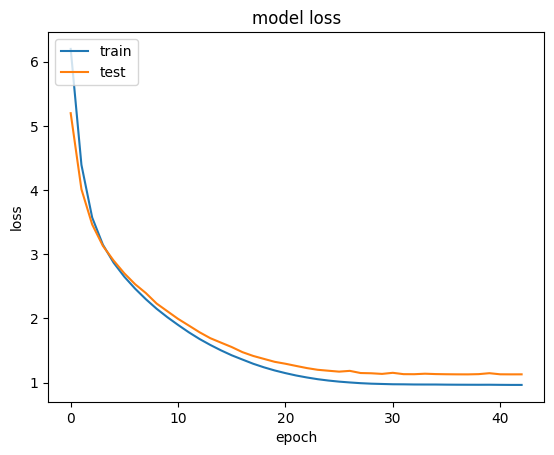

17972/17972 [==============================] - 181s 10ms/step
Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
1.8005, 1.6262, 1.5358, 1.4638, 1.4280, 1.4105
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
4.9563, 4.7124, 4.6524, 4.6161, 4.6328, 4.6656
TP  20


ValueError: cannot reshape array of size 21102576 into shape (142,4500,64)

In [73]:
#Combine-features

percent = [10,20,10,20]

gcn_gamma = 0.5

for i in range(len(percent)):
    node_features =  []
    if i<1:
        print("RT ", percent[i])
        data_org = np.load(base_path.format('rtdata_full_O.npy'))
        data_org_indicator = copy.deepcopy(data_org)
        data_org_indicator[np.where(data_org_indicator>0)] = 1

        data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent[i])))
        data_train_indicator = copy.deepcopy(data_train)
        data_train_indicator[np.where(data_train_indicator>0)] = 1

        outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
        outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
        outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
        outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
        outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))
        
        loss_fn = Custom_Loss(gcn_gamma)
        temp_train = copy.deepcopy(data_train)
        gcn_features = []
        
        for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
            temp = temp_train[:,:,k]
        #     a = time.time()
        #     csm_user, csm_serv = similarity_feature(temp)
        #     csm_user = user_train_and_test(csm_user)
        #     csm_serv = serv_train_and_test(csm_serv)
        #     csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

        #     user_stat, serv_stat = statistical_feature(temp)

        #     user_svd, serv_svd = svd_feature(temp)
        #     svd_feat = np.concatenate((user_svd, serv_svd), axis=0)
        #     stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        #     node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)
        #     node_features.append(node_feature)
            node_feature = np.load(base_path.format('RT_{}_node_features.npy'.format(percent[i])))[k-55]

            # node_feature = np.load(base_path.format('RT_{}_Combine_Feature.npy'.format(percent[i])))
            # node_feature  = node_feature.reshape(9, 142+4500, 155)

            adj_norm = adj_calculation(data_train[:,:,k])
            gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])
            
            gcn_features.append(gcn_extracted_features)

        # gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
        # np.save(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}'.format(percent[i], gcn_gamma)), gcn_features)
        # np.save(base_path.format('RT_{}_node_features'.format(percent[i])), node_features)
        np.save(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}_with_attn'.format(percent[i], gcn_gamma)), gcn_features)

        gcn_features = np.load(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}_with_attn.npy'.format(percent[i], gcn_gamma)))

        gcn_features = gcn_features.reshape(9, 142+4500, 128)
        
        X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1
        
        np.save(base_path.format('RT_X_train_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), X_train)
        np.save(base_path.format('RT_Y_train_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), Y_train)
        np.save(base_path.format('RT_X_pred_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), X_pred)

        X_train = np.load(base_path.format('RT_X_train_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
        Y_train = np.load(base_path.format('RT_Y_train_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
        X_pred = np.load(base_path.format('RT_X_pred_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
       
        xt = copy.deepcopy(X_train[:,:,:])
        xt = np.transpose(xt, axes=(0,1,2))

        xp = copy.deepcopy(X_pred[:,:,:])
        xp = np.transpose(xp, axes=(0,1,2))

        # gammas = [ 0.1, 0.25, 0.5, 0.75, 1, 5, 10]
        # gammas = [ 0.25, 0.5, 0.75, 1]
        gammas = [0.75]
        mae_min = 100
        for gamma in gammas:
            print("For gamma = ", gamma)
            # loss_obj = Utility(gamma)
            overall_pred = copy.deepcopy(data_train)
            transf_model, t_train_time = transformer_train(63, gamma, xt, Y_train)
            overall_pred[:,:,-1], t_pred_time, mae = transformer_predict(transf_model, 63, xp)

            if mae_min > mae:
                mae_min = mae
                np.save(base_path.format('RT_transformer_pred'.format(percent[i])), overall_pred)
            
#         print("Transformer training time = {:.5f}".format(t_train_time))
#         print("T prediction time = {:.5f}".format(t_pred_time))
        
    else:
        print("TP ", percent[i])
        data_org = np.load(base_path.format('tpdata_full_O.npy'))
        data_org_indicator = copy.deepcopy(data_org)
        data_org_indicator[np.where(data_org_indicator>0)] = 1

        data_train = np.load(base_path.format('tpdata_{}.npy'.format(percent[i])))
        data_train_indicator = copy.deepcopy(data_train)
        data_train_indicator[np.where(data_train_indicator>0)] = 1

        outlier2 = np.load(base_path.format('tp_outlier_{}.npy'.format(2)))
        outlier4 = np.load(base_path.format('tp_outlier_{}.npy'.format(4)))
        outlier6 = np.load(base_path.format('tp_outlier_{}.npy'.format(6)))
        outlier8 = np.load(base_path.format('tp_outlier_{}.npy'.format(8)))
        outlier10 = np.load(base_path.format('tp_outlier_{}.npy'.format(10)))
        
        temp_train = copy.deepcopy(data_train)
        
        gamma_gcn = [1,10]
        for ggcn in gamma_gcn:
            loss_fn = Custom_Loss(ggcn)

            gcn_features = []

            for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
                temp = temp_train[:,:,k]
                a = time.time()
                csm_user, csm_serv = similarity_feature(temp)
                csm_user = user_train_and_test(csm_user)
                csm_serv = serv_train_and_test(csm_serv)
                csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

                user_stat, serv_stat = statistical_feature(temp)

                user_svd, serv_svd = svd_feature(temp)
                svd_feat = np.concatenate((user_svd, serv_svd), axis=0)
                stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

                node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)

                adj_norm = adj_calculation(data_train[:,:,k])
                gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])
                gcn_features.append(gcn_extracted_features)

            gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
            np.save(base_path.format('TP_{}_GCN_Combine_Feature_adamW_{}'.format(percent[i], ggcn)), gcn_features)

            gcn_features = np.load(base_path.format('TP_{}_GCN_Combine_Feature_adamW_{}.npy'.format(percent[i], ggcn)))

            gcn_features = gcn_features.reshape(9, 142+4500, 128)

            X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

            np.save(base_path.format('TP_X_train_8_adamW_{}_{}'.format(percent[i], ggcn)), X_train)
            np.save(base_path.format('TP_Y_train_8_adamW_{}_{}'.format(percent[i], ggcn)), Y_train)
            np.save(base_path.format('TP_X_pred_8_adamW_{}_{}'.format(percent[i], ggcn)), X_pred)

            X_train = np.load(base_path.format('TP_X_train_8_adamW_{}_{}.npy'.format(percent[i], ggcn)))
            Y_train = np.load(base_path.format('TP_Y_train_8_adamW_{}_{}.npy'.format(percent[i], ggcn)))
            X_pred = np.load(base_path.format('TP_X_pred_8_adamW_{}_{}.npy'.format(percent[i], ggcn)))

            xt = copy.deepcopy(X_train[:,:,:])
            xt = np.transpose(xt, axes=(0,1,2))

            xp = copy.deepcopy(X_pred[:,:,:])
            xp = np.transpose(xp, axes=(0,1,2))

            gamma_transf = [10, 5, 1, 0.75, 0.5, 0.25, 0.1]
            for gtrans in gamma_transf:
                print("For gamma = ", gtrans)
                loss_obj = Utility(gtrans)
                overall_pred = copy.deepcopy(data_train)
                transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)
                overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)
                print("Transformer training time = {:.5f}".format(t_train_time))
                print("T prediction time = {:.5f}".format(t_pred_time))

In [43]:
percent = [10,20,10,20]

gcn_gamma = 5

for i in range(len(percent)):
    node_features =  []
    if i<1:
        print("RT ", percent[i])
        data_org = np.load(base_path.format('rtdata_full_O.npy'))
        data_org_indicator = copy.deepcopy(data_org)
        data_org_indicator[np.where(data_org_indicator>0)] = 1

        data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent[i])))
        data_train_indicator = copy.deepcopy(data_train)
        data_train_indicator[np.where(data_train_indicator>0)] = 1

        outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
        outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
        outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
        outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
        outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))
        
        loss_fn = Custom_Loss(gcn_gamma)
        temp_train = copy.deepcopy(data_train)
        gcn_features = []
        
        for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
            temp = temp_train[:,:,k]
        #     a = time.time()
        #     csm_user, csm_serv = similarity_feature(temp)
        #     csm_user = user_train_and_test(csm_user)
        #     csm_serv = serv_train_and_test(csm_serv)
        #     csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

        #     user_stat, serv_stat = statistical_feature(temp)

        #     user_svd, serv_svd = svd_feature(temp)
        #     svd_feat = np.concatenate((user_svd, serv_svd), axis=0)
        #     stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        #     node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)
        #     node_features.append(node_feature)
            node_feature = np.load(base_path.format('RT_{}_node_features.npy'.format(percent[i])))[k-55]

            # node_feature = np.load(base_path.format('RT_{}_Combine_Feature.npy'.format(percent[i])))
            # node_feature  = node_feature.reshape(9, 142+4500, 155)

            adj_norm = adj_calculation(data_train[:,:,k])
            gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])
            
            gcn_features.append(gcn_extracted_features)

        gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
        # np.save(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}'.format(percent[i], gcn_gamma)), gcn_features)
        # np.save(base_path.format('RT_{}_node_features'.format(percent[i])), node_features)
        np.save(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}_with_attn'.format(percent[i], gcn_gamma)), gcn_features)

        gcn_features = np.load(base_path.format('RT_{}_GCN_Combine_Feature_adamW_{}_with_attn.npy'.format(percent[i], gcn_gamma)))

        gcn_features = gcn_features.reshape(9, 142+4500, 128)
        
        X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1
        
        np.save(base_path.format('RT_X_train_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), X_train)
        np.save(base_path.format('RT_Y_train_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), Y_train)
        np.save(base_path.format('RT_X_pred_8_adamW_{}_{}_with_attn'.format(percent[i], gcn_gamma)), X_pred)

        # X_train = np.load(base_path.format('RT_X_train_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
        # Y_train = np.load(base_path.format('RT_Y_train_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
        # X_pred = np.load(base_path.format('RT_X_pred_8_adamW_{}_{}_with_attn.npy'.format(percent[i], gcn_gamma)))
       
        xt = copy.deepcopy(X_train[:,:,:])
        xt = np.transpose(xt, axes=(0,1,2))

        xp = copy.deepcopy(X_pred[:,:,:])
        xp = np.transpose(xp, axes=(0,1,2))

        # gammas = [ 0.1, 0.25, 0.5, 0.75, 1, 5, 10]
        gammas = [ 0.25, 0.5, 0.75, 1]
        mae_min = 100
        for gamma in gammas:
            print("For gamma = ", gamma)
            loss_obj = Utility(gamma)
            overall_pred = copy.deepcopy(data_train)
            transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)
            overall_pred[:,:,-1], t_pred_time, mae = transformer_predict(transf_model, 63, xp)

            if mae_min > mae:
                mae_min = mae
                np.save(base_path.format('RT_transformer_pred'.format(percent[i])), overall_pred)

RT  10


  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# RT-10 gamma = 5
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0285, 0.9252, 0.8601, 0.8019, 0.7563, 0.7247
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.8950, 2.6822, 2.5959, 2.5260, 2.4886, 2.4698

For gamma =  0.25
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.9118, 0.8087, 0.7429, 0.6827, 0.6348, 0.6003
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.9140, 2.7162, 2.6297, 2.5568, 2.5177, 2.4957

For gamma =  0.5
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.9121, 0.8067, 0.7384, 0.6766, 0.6272, 0.5912
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.9488, 2.7441, 2.6528, 2.5766, 2.5347, 2.5102

In [ ]:
# with AdamW
# GCN
# [2500, 10000], [1e-0, 1e-1, 1e-2])       
# lr = 1e-3 
# wd = 1e-4 

# transformer
# [10, 20], [1e-0, 1e-1, 1e-2]
# lr = 1e-4 
# wd = 1e-5

# RT10
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0030, 0.8892, 0.8291, 0.7763, 0.7361, 0.7084
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.9238, 2.6832, 2.6041, 2.5422, 2.5119, 2.4996
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 0.8228, 0.7086, 0.6403, 0.5803, 0.5348, 0.5041
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 2.7194, 2.4783, 2.3799, 2.3022, 2.2656, 2.2496

# RT20
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.6979, 0.6150, 0.5692, 0.5283, 0.4971, 0.4762
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.3482, 2.1432, 2.0737, 2.0175, 1.9902, 1.9817
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 0.6269, 0.5400, 0.4919, 0.4483, 0.4152, 0.3942
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 2.2874, 2.0727, 1.9975, 1.9349, 1.9049, 1.8932


# TP10
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.5506, 2.7552, 1.9428, 1.5579, 1.3063, 1.1455
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 39.6347, 12.2216, 7.2370, 5.2327, 4.1727, 3.5095
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 6.3255, 2.7803, 1.8770, 1.4798, 1.2262, 1.0651
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 45.1194, 12.6938, 6.8356, 4.6938, 3.7859, 3.2126

# TP20
# Time-stamp =  63
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.3865, 2.2045, 1.5235, 1.2170, 1.0198, 0.8877
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 34.7350, 11.1865, 6.3128, 4.4320, 3.5827, 2.9768
# Time-stamp =  63
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 5.3469, 2.3725, 1.5264, 1.1570, 0.9607, 0.8405
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
# 41.1733, 12.4984, 6.4614, 3.9612, 3.0831, 2.6435
# Transformer training time = 692.72442
# T prediction time = 0.00041

In [44]:
Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.8424, 0.7252, 0.6543, 0.5923, 0.5476, 0.5170
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.7108, 2.4548, 2.3540, 2.2719, 2.2335, 2.2141

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.7935, 0.6894, 0.6352, 0.5872, 0.5509, 0.5233
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.6198, 2.4072, 2.3335, 2.2733, 2.2452, 2.2292

(9, 4642, 128)
(9, 142, 128) (9, 4500, 128) (142, 4500)


  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2912.5134422779083
(63900, 9, 256) (575100, 9, 256)
(9, 256)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 9, 256)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_28 (MultiH (None, 9, 256)       1051904     input_8[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.add_56 (TFOpLa (None, 9, 256)       0           multi_head_attention_28[0][0]    
                                                                 input_8[

1598/1598 [==============================] - 18s 10ms/step - loss: 3.0632 - mae: 13.3012 - val_loss: 2.7636 - val_mae: 11.2977
Epoch 2/200
1598/1598 [==============================] - 17s 10ms/step - loss: 2.6389 - mae: 12.0454 - val_loss: 2.3691 - val_mae: 10.9059
Epoch 3/200
1598/1598 [==============================] - 17s 11ms/step - loss: 2.4593 - mae: 11.3098 - val_loss: 2.2514 - val_mae: 10.0407
Epoch 4/200
1598/1598 [==============================] - 17s 10ms/step - loss: 2.3911 - mae: 10.8961 - val_loss: 2.2600 - val_mae: 9.9480
Epoch 5/200
1598/1598 [==============================] - 17s 11ms/step - loss: 2.3378 - mae: 10.5145 - val_loss: 2.2060 - val_mae: 9.7400
Epoch 6/200
1598/1598 [==============================] - 17s 11ms/step - loss: 2.3099 - mae: 10.2455 - val_loss: 2.1812 - val_mae: 9.5381
Epoch 7/200
1598/1598 [==============================] - 17s 11ms/step - loss: 2.2970 - mae: 10.0579 - val_loss: 2.1971 - val_mae: 9.2147
Epoch 8/200
1598/1598 [====================

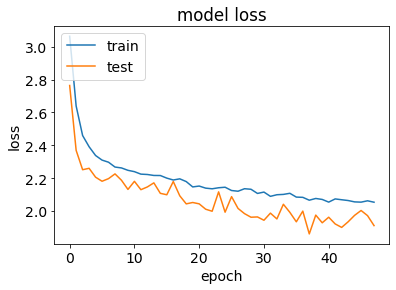

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
6.4638, 2.8812, 1.9507, 1.5428, 1.2881, 1.1263
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
45.4045, 12.9284, 6.9183, 4.6632, 3.6852, 3.1365
Transformer training time = 808.44085
T prediction time = 0.00047


In [23]:
#SVD-features

# gammas = [5]

# for gamma in gammas:
#     loss_fn = Custom_Loss(gamma)
#     gcn_features = []
#     print("For gamma = ", gamma)

#     for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
#         temp = temp_train[:,:,k]
    
#         user_svd, serv_svd = svd_feature(temp)
#         svd_feat = np.concatenate((user_svd, serv_svd), axis=0)

#         node_feature = np.array(svd_feat)

#         ae_time = ae_time + time.time() - a

#         a = time.time()

#         adj_norm = adj_calculation(data_train[:,:,k])
#         gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

#         gcn_features.append(gcn_extracted_features)
#         gcn_time = gcn_time + time.time() - a

#     gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
#     np.save(base_path.format('TP_{}_GCN_SVD_{}'.format(percent, gamma)), gcn_features)  
#     print("AE Training time:{}\nGCN training time:{}".format(ae_time,gcn_time))
    
# for gamma in gammas:
gcn_features = np.load(base_path.format('TP_{}_GCN_SVD_{}.npy'.format(percent, 5)))
gcn_features = gcn_features.reshape(9, 142+4500, 128)

print(gcn_features.shape)

a=time.time()
X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

train_time = time.time() - a
print("Time taken for generating input for transformer inputs = {}".format(train_time))

xt = copy.deepcopy(X_train[:,:,:])
xt = np.transpose(xt, axes=(0,1,2))

xp = copy.deepcopy(X_pred[:,:,:])
xp = np.transpose(xp, axes=(0,1,2))

print(xt.shape, xp.shape)

loss_obj = Utility(0.5)

overall_pred = copy.deepcopy(data_train)
transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

print("Transformer training time = {:.5f}".format(t_train_time))
print("T prediction time = {:.5f}".format(t_pred_time))

In [26]:
# np.save(base_path.format('TP_{}_X_train_8_time'.format(percent)), X_train)
# np.save(base_path.format('TP_{}_Y_train_8_time'.format(percent)), Y_train)
# np.save(base_path.format('TP_{}_X_pred_8_time'.format(percent)), X_pred)

For gamma =  5


  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.0035233497619628906
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.8316, 1.7287, 1.3191, 1.0966, 0.9411, 0.8354
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 40.2903, 8.0081, 5.3946, 4.0940, 3.1811, 2.6062
GCN prediction:0.0034127235412597656
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.2355, 1.9165, 1.4007, 1.1409, 0.9706, 0.8584
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 36.8740, 9.8907, 5.9878, 4.4270, 3.5316, 3.0333
GCN prediction:0.0035724639892578125
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.7719, 1.8974, 1.4414, 1.2066, 1.0330, 0.9067
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 32.5606, 9.1972, 5.9323, 4.5786, 3.6885, 3.0467
GCN prediction:0.0033185482025146484
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.4560, 1.9741, 1.4602, 1.1790, 0.9993, 0.8879
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%

  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2771.602110147476
(127800, 9, 256) (511200, 9, 256)
(9, 256)
Model: "model_513"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_514 (InputLayer)          [(None, 9, 256)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_344 (Multi (None, 9, 256)       1051904     input_514[0][0]                  
                                                                 input_514[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_688 (TFOpL (None, 9, 256)       0           multi_head_attention_344[0][0]   
                                                                 input_

Epoch 1/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.7709 - mae: 11.8250 - val_loss: 1.4141 - val_mae: 8.3318
Epoch 2/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.4999 - mae: 10.0260 - val_loss: 1.3684 - val_mae: 7.7063
Epoch 3/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.4533 - mae: 9.4847 - val_loss: 1.3319 - val_mae: 7.7394
Epoch 4/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.4194 - mae: 9.1163 - val_loss: 1.2397 - val_mae: 7.0905
Epoch 5/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.4053 - mae: 8.9458 - val_loss: 1.3962 - val_mae: 7.3309
Epoch 6/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.3897 - mae: 8.7132 - val_loss: 1.2805 - val_mae: 7.0437
Epoch 7/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.3687 - mae: 8.4105 - val_loss: 1.2167 - val_mae: 6.7568
Epoch 8/200
3195/3195 [================

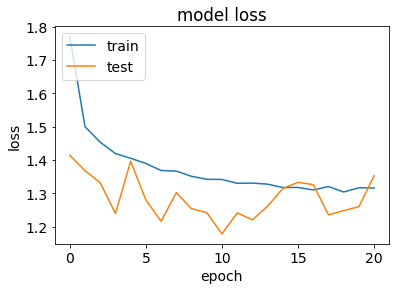

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
5.0742, 2.2169, 1.4750, 1.1558, 0.9794, 0.8590
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
39.7723, 11.1886, 5.9427, 3.9432, 3.2158, 2.7571
Transformer training time = 651.56429
T prediction time = 0.00042


In [112]:
#cosine-features

gammas = [5]

for gamma in gammas:
    loss_fn = Custom_Loss(gamma)
    gcn_features = []
#     print("Dimension for the NMF = ", dim)
    print("For gamma = ", gamma)

    for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
        temp = temp_train[:,:,k]
        a = time.time()
        csm_user, csm_serv = similarity_feature(temp)
        csm_user = user_train_and_test(csm_user)
        csm_serv = serv_train_and_test(csm_serv)
        csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

        node_feature = np.array(csm_feature)

        ae_time = ae_time + time.time() - a

        a = time.time()

        adj_norm = adj_calculation(data_train[:,:,k])
        gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

        gcn_features.append(gcn_extracted_features)
        gcn_time = gcn_time + time.time() - a

    gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
    np.save(base_path.format('TP_{}_GCN_Cosine_{}'.format(percent, gamma)), gcn_features)
    print("AE Training time:{}\nGCN training time:{}".format(ae_time,gcn_time))
    
for gamma in gammas:
    gcn_features = np.load(base_path.format('TP_{}_GCN_Cosine_{}.npy'.format(percent, gamma)))
    gcn_features = gcn_features.reshape(9, 142+4500, 128)
    
    print(gcn_features.shape)

    a=time.time()
    X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

    train_time = time.time() - a
    print("Time taken for generating input for transformer inputs = {}".format(train_time))
    
    xt = copy.deepcopy(X_train[:,:,:])
    xt = np.transpose(xt, axes=(0,1,2))

    xp = copy.deepcopy(X_pred[:,:,:])
    xp = np.transpose(xp, axes=(0,1,2))
    
    print(xt.shape, xp.shape)
    
    loss_obj = Utility(1)
    
    overall_pred = copy.deepcopy(data_train)
    transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

    overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)
    
    print("Transformer training time = {:.5f}".format(t_train_time))
    print("T prediction time = {:.5f}".format(t_pred_time))

For gamma =  5


  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.0028460025787353516
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.2658, 2.3003, 1.8220, 1.5304, 1.3324, 1.1924
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 37.2889, 8.6316, 5.9958, 4.5681, 3.6300, 3.0081
GCN prediction:0.0028526782989501953
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.4459, 2.5009, 1.9089, 1.5736, 1.3419, 1.1855
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 32.5504, 11.1456, 6.9111, 5.0061, 3.9139, 3.2715
GCN prediction:0.002941608428955078
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.3974, 3.1621, 2.4251, 2.0008, 1.7198, 1.5368
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 35.7851, 12.5847, 7.9274, 5.7132, 4.4646, 3.7978
GCN prediction:0.0028569698333740234
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 8.5336, 4.5734, 3.1725, 2.3066, 1.7758, 1.5030
rmse Gconv with removing 0%, 2%, 4%, 6%, 8

  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2759.0221784114838
(127800, 9, 256) (511200, 9, 256)
(9, 256)
Model: "model_523"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_524 (InputLayer)          [(None, 9, 256)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_348 (Multi (None, 9, 256)       1051904     input_524[0][0]                  
                                                                 input_524[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_696 (TFOpL (None, 9, 256)       0           multi_head_attention_348[0][0]   
                                                                 input

Epoch 1/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.8197 - mae: 11.8380 - val_loss: 1.5347 - val_mae: 8.9454
Epoch 2/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6929 - mae: 10.9274 - val_loss: 1.5166 - val_mae: 8.4481
Epoch 3/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6518 - mae: 10.2472 - val_loss: 1.5296 - val_mae: 8.1347
Epoch 4/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6307 - mae: 9.9931 - val_loss: 1.5166 - val_mae: 8.3641
Epoch 5/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6194 - mae: 9.8552 - val_loss: 1.5454 - val_mae: 8.3502
Epoch 6/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6185 - mae: 9.7504 - val_loss: 1.5148 - val_mae: 8.1150
Epoch 7/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.6079 - mae: 9.7529 - val_loss: 1.5411 - val_mae: 8.1083
Epoch 8/200
3195/3195 [===============

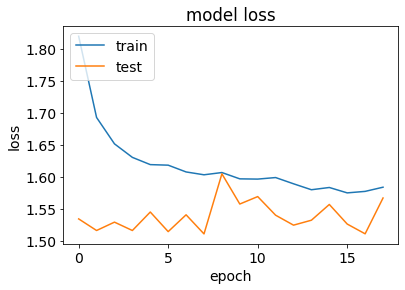

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
6.1931, 3.0329, 2.0507, 1.5661, 1.2874, 1.1112
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
42.8506, 13.9958, 7.6648, 4.8016, 3.6321, 3.0422
Transformer training time = 558.52391
T prediction time = 0.00041


In [113]:
#stat-features

gammas = [5]

for gamma in gammas:
    loss_fn = Custom_Loss(gamma)
    gcn_features = []
    print("For gamma = ", gamma)

    for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
        temp = temp_train[:,:,k]
        a = time.time()
        
        user_stat, serv_stat = statistical_feature(temp)
        stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        node_feature = np.array(stat_feature)

        ae_time = ae_time + time.time() - a

        a = time.time()

        adj_norm = adj_calculation(data_train[:,:,k])
        gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

        gcn_features.append(gcn_extracted_features)
        gcn_time = gcn_time + time.time() - a

    gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
    np.save(base_path.format('TP_{}_GCN_Stat_{}'.format(percent, gamma)), gcn_features)

#     np.save(base_path.format('RT_{}_GCN_combine_{}'.format(percent, gamma)), gcn_features)  
#     np.save(base_path.format('RT_{}_GCN_SVD_cosine_stat_{}'.format(percent, gamma)), gcn_features)    
    print("AE Training time:{}\nGCN training time:{}".format(ae_time,gcn_time))
    
    
for gamma in gammas:
    gcn_features = np.load(base_path.format('TP_{}_GCN_Stat_{}.npy'.format(percent, gamma)))
    gcn_features = gcn_features.reshape(9, 142+4500, 128)
    
    print(gcn_features.shape)

    a=time.time()
    X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

    train_time = time.time() - a
    print("Time taken for generating input for transformer inputs = {}".format(train_time))
    
    xt = copy.deepcopy(X_train[:,:,:])
    xt = np.transpose(xt, axes=(0,1,2))

    xp = copy.deepcopy(X_pred[:,:,:])
    xp = np.transpose(xp, axes=(0,1,2))
    
    print(xt.shape, xp.shape)
    
    loss_obj = Utility(1)
    
    overall_pred = copy.deepcopy(data_train)
    transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

    overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)
    
    print("Transformer training time = {:.5f}".format(t_train_time))
    print("T prediction time = {:.5f}".format(t_pred_time))

For gamma =  5


  0%|          | 0/9 [00:00<?, ?it/s]

GCN prediction:0.003287076950073242
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.9911, 1.9061, 1.8683, 1.8380, 1.8339, 1.8405
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.0528, 4.9471, 4.9402, 4.9368, 4.9679, 5.0069
GCN prediction:0.003328084945678711
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.3047, 2.2188, 2.1789, 2.1448, 2.1431, 2.1517
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.7378, 5.6448, 5.6448, 5.6457, 5.6844, 5.7315
GCN prediction:0.003261089324951172
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.3695, 2.2458, 2.1810, 2.1325, 2.1230, 2.1326
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.7592, 5.6100, 5.5897, 5.5875, 5.6300, 5.6852
GCN prediction:0.0033075809478759766
Time-stamp =  58
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.3126, 2.1939, 2.1425, 2.1027, 2.0935, 2.0991
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% 

  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2777.6707644462585
(127800, 9, 256) (511200, 9, 256)
(9, 256)
Model: "model_306"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_307 (InputLayer)          [(None, 9, 256)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_172 (Multi (None, 9, 256)       1051904     input_307[0][0]                  
                                                                 input_307[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_344 (TFOpL (None, 9, 256)       0           multi_head_attention_172[0][0]   
                                                                 input

Epoch 1/200
3195/3195 [==============================] - 34s 10ms/step - loss: 1.2941 - mae: 2.1206 - val_loss: 1.4408 - val_mae: 2.2627
Epoch 2/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.1941 - mae: 2.0043 - val_loss: 1.4557 - val_mae: 2.2856
Epoch 3/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.1857 - mae: 1.9927 - val_loss: 1.4003 - val_mae: 2.2364
Epoch 4/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.1810 - mae: 1.9861 - val_loss: 1.4731 - val_mae: 2.2772
Epoch 5/200
3195/3195 [==============================] - 33s 10ms/step - loss: 1.1847 - mae: 1.9946 - val_loss: 1.4403 - val_mae: 2.2666
Epoch 6/200
3195/3195 [==============================] - 31s 10ms/step - loss: 1.1755 - mae: 1.9756 - val_loss: 1.4448 - val_mae: 2.2295
Epoch 7/200
3195/3195 [==============================] - 32s 10ms/step - loss: 1.1705 - mae: 1.9607 - val_loss: 1.4319 - val_mae: 2.2308
Epoch 8/200
3195/3195 [==================

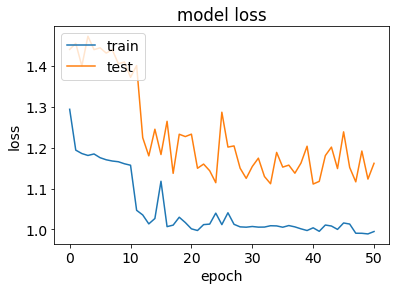

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.8931, 0.7842, 0.7060, 0.6399, 0.5968, 0.5664
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.9894, 2.7681, 2.6486, 2.5555, 2.5184, 2.4994
Transformer training time = 1634.42098
T prediction time = 0.00042


In [77]:
#euclid-features
# gammas = [5]

# for gamma in gammas:
#     loss_fn = Custom_Loss(gamma)
#     gcn_features = []
#     print("For gamma = ", gamma)

#     for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
#         temp = temp_train[:,:,k]
#         a = time.time()
#         u_euclid, s_euclid = euclidean_dist(temp)    
#         u_euclid = user_train_and_test(u_euclid)
#         s_euclid = serv_train_and_test(s_euclid)
        
#         dist_feature = np.concatenate((u_euclid, s_euclid), axis=0)

#         node_feature = np.array(dist_feature)

#         ae_time = ae_time + time.time() - a

#         a = time.time()

#         adj_norm = adj_calculation(data_train[:,:,k])
#         gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

#         gcn_features.append(gcn_extracted_features)
#         gcn_time = gcn_time + time.time() - a

#     gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 128)
#     np.save(base_path.format('RT_{}_GCN_Euclid_{}'.format(percent, gamma)), gcn_features)
    
#     print("AE Training time:{}\nGCN training time:{}".format(ae_time,gcn_time))
    
    
# for gamma in gammas:
#     gcn_features = np.load(base_path.format('RT_{}_GCN_Euclid_{}.npy'.format(percent, gamma)))
#     gcn_features = gcn_features.reshape(9, 142+4500, 128)
    
#     print(gcn_features.shape)

#     a=time.time()
#     X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

#     train_time = time.time() - a
#     print("Time taken for generating input for transformer inputs = {}".format(train_time))
    
#     xt = copy.deepcopy(X_train[:,:,:])
#     xt = np.transpose(xt, axes=(0,1,2))

#     xp = copy.deepcopy(X_pred[:,:,:])
#     xp = np.transpose(xp, axes=(0,1,2))
    
#     print(xt.shape, xp.shape)
    
#     loss_obj = Utility(0.5)
    
#     overall_pred = copy.deepcopy(data_train)
#     transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

#     overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)
    
#     print("Transformer training time = {:.5f}".format(t_train_time))
#     print("T prediction time = {:.5f}".format(t_pred_time))

In [114]:
percent = 10
base_path = '/home/suraj/Desktop/www2023/dataset2/setup2/{}'
data_org = np.load(base_path.format('rtdata_full_O.npy'))
data_org_indicator = copy.deepcopy(data_org)
data_org_indicator[np.where(data_org_indicator>0)] = 1

data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent)))
data_train_indicator = copy.deepcopy(data_train)
data_train_indicator[np.where(data_train_indicator>0)] = 1

outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))

data_org.shape, data_train.shape, data_train_indicator.shape, outlier2.shape

((142, 4500, 64), (142, 4500, 64), (142, 4500, 64), (142, 4500, 64))

In [115]:
def graph_creation(data_train):
    G = nx.Graph()
    edge_list = []        
    for i in range(data_train.shape[0]):
        for j in range(data_train.shape[1]):
            edge_list.append(('U_'+str(i),'S_'+str(j), data_train[i][j]))

    G.add_weighted_edges_from(edge_list) #graph
    adj = nx.to_numpy_array(G)

    edges = []
    for i in range(adj.shape[0]):
        for j in range(adj.shape[1]):
            if adj[i][j] !=0:
                edges.append((i,j))
    return edges

class GraphAttention(layers.Layer):
    def __init__(
        self,
        units,
        kernel_initializer="glorot_uniform",
        kernel_regularizer=None,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.units = units
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
        self.kernel_regularizer = keras.regularizers.get(kernel_regularizer)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[0][-1], self.units),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel",
        )
        self.kernel_attention = self.add_weight(
            shape=(self.units * 2, 1),
            trainable=True,
            initializer=self.kernel_initializer,
            regularizer=self.kernel_regularizer,
            name="kernel_attention",
        )
        self.built = True

    def call(self, inputs):
        node_states, edges = inputs
        
        #print(node_states.shape, self.kernel.shape)

        # Linearly transform node states
        node_states_transformed = tf.matmul(node_states, self.kernel)
        
        #print(node_states_transformed.shape)

        # (1) Compute pair-wise attention scores
        node_states_expanded = tf.gather(node_states_transformed, edges)
        
        #print(node_states_expanded.shape)
        
        node_states_expanded = tf.reshape(node_states_expanded, (tf.shape(edges)[0], -1))
        #print(node_states_expanded.shape, self.kernel_attention.shape)
        
#         print(self.kernel_attention.shape)
#         print(node_states_expanded.shape)
        
        attention_scores = tf.matmul(tf.nn.leaky_relu(node_states_expanded), self.kernel_attention) #gatv2 
        
        #print(attention_scores.shape, attention_scores)
        
        attention_scores = tf.squeeze(attention_scores, -1)
        
#         print(attention_scores.shape)

        # (2) Normalize attention scores
        attention_scores = tf.math.exp(tf.clip_by_value(attention_scores, -1, 1))
        
        #print(attention_scores.shape)
        
        attention_scores_sum = tf.math.unsorted_segment_sum(
            data=attention_scores,
            segment_ids=edges[:, 0],
            num_segments=tf.reduce_max(edges[:, 0]) + 1,)
        
        #print(attention_scores_sum.shape)
        
        attention_scores_sum = tf.repeat(attention_scores_sum, tf.math.bincount(tf.cast(edges[:, 0], "int32")))
        
        #print(attention_scores_sum.shape)
        
        attention_scores_norm = attention_scores / attention_scores_sum

        # (3) Gather node states of neighbors, apply attention scores and aggregate
        node_states_neighbors = tf.gather(node_states_transformed, edges[:, 1])
        out = tf.math.unsorted_segment_sum(
            data=node_states_neighbors * attention_scores_norm[:, tf.newaxis],
            segment_ids=edges[:, 0],
            num_segments=tf.shape(node_states)[0],
        )
        return tf.nn.relu(out)
    
class MultiHeadGraphAttention(layers.Layer):
    def __init__(self, units, num_heads=8, merge_type="concat", **kwargs):
        super().__init__(**kwargs)
        self.num_heads = num_heads
        self.merge_type = merge_type
        self.attention_layers = [GraphAttention(units) for _ in range(num_heads)]
        self.inputs_shape = (4642, units, num_heads)
        self.conv1d = Conv1D(filters=1, kernel_size=1, activation=None, padding='same', input_shape=self.inputs_shape[1:])

        
    def call(self, inputs):
        atom_features, pair_indices = inputs

        # Obtain outputs from each attention head
        outputs = [
            attention_layer([atom_features, pair_indices])
            for attention_layer in self.attention_layers
        ]
        
#         outputs = Concatenate(axis=-1)([tf.expand_dims(attention_layer([atom_features, pair_indices]), axis=-1)
#                                   for attention_layer in self.attention_layers])
#         outputs = self.conv1d(outputs)
#         outputs = tf.reshape(outputs, shape=(self.inputs_shape[0], self.inputs_shape[1]))
        
        
        # Concatenate or average the node states from each head
        if self.merge_type == "concat":
            outputs = tf.concat(outputs, axis=-1)
        else:
            outputs = tf.reduce_mean(tf.stack(outputs, axis=-1), axis=-1)
        # Activate and return node states
        return outputs
    
class GraphAttentionNetwork(keras.Model):
    def __init__(
        self,
        edges,
        hidden_units,
        num_heads,
        num_layers,
        output_dim,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.edges = edges
        self.preprocess = layers.Dense(hidden_units * num_heads, activation="relu")
        self.attention_layers = [
            MultiHeadGraphAttention(hidden_units, num_heads) for _ in range(num_layers)
        ]
            
#         self.attention_layers1 = MultiHeadGraphAttention(hidden_units, num_heads)
#         self.attention_layers2 = MultiHeadGraphAttention(hidden_units, num_heads)
#         self.attention_layers3 = MultiHeadGraphAttention(hidden_units, num_heads)
        
        self.output_layer = layers.Dense(output_dim)

    def call(self, node_states):
        x = self.preprocess(node_states)
        for attention_layer in self.attention_layers:
            x = attention_layer([x, self.edges]) + x
        
        outputs = self.output_layer(x)
        
        u_embed, s_embed = tf.split(outputs, [142, 4500], 0) 
        pred_rt = tf.matmul(u_embed, s_embed, transpose_a=False, transpose_b=True, name='output')       
        return pred_rt, outputs

class gat_training(keras.Model):
    def __init__(self, data_O, util_object, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_DIM, outlier0, outlier2, outlier4, outlier6, outlier8, outlier10):
        self.data_O = data_O
        self.outlier0 = outlier0
        self.outlier2 = outlier2
        self.outlier4 = outlier4
        self.outlier6 = outlier6
        self.outlier8 = outlier8
        self.outlier10 = outlier10
        self.utility = util_object
        self.HIDDEN_UNITS = HIDDEN_UNITS
        self.NUM_LAYERS = NUM_LAYERS
        self.OUTPUT_DIM = OUTPUT_DIM
        self.edges = edges
        
    def gat_train_and_test(self, k, data_train, node_states, edges, NUM_HEADS):
        # optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
        LEARNING_RATE = 3e-1
        optimizer = keras.optimizers.SGD(LEARNING_RATE, momentum=0.9)
        
        input_feature = tf.cast(node_states, dtype='float32')
  
        # Build model
        gat_model = GraphAttentionNetwork(edges, self.HIDDEN_UNITS, NUM_HEADS, self.NUM_LAYERS, self.OUTPUT_DIM) 

        F = node_states.shape[1]

        inputs = layers.Input(shape=(F,))

        outputs = gat_model(inputs)
        model = Model(inputs, outputs)

        patience = 300
        wait = 0
        best = float('inf')

        @tf.function
        def train():
            with tf.GradientTape() as tape:
                pred, all_embed = model(input_feature, training = True)
                loss_value = self.utility(data_train, pred)
                loss_value += sum(model.losses) 
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            return loss_value

        train_loss = []
        for epoch in range(20000):
            start_time = time.time()    
            loss_value = train()

            if epoch%100==0:
                train_loss.append(loss_value)
#                 print(f"epoch: {epoch:d} -- loss: {loss_value:.5f} -- time-taken:{time.time()-start_time} ")

            wait += 1
            if loss_value < best:
                best = loss_value
                wait = 0
            if wait >= patience:
                print("**********Early Training END**********")
                break

        with tf.device('cpu'):
            #gconv-prediction
            a = time.time()
            rt_pred, gat_embedding = model(input_feature, training=False)
            rt_pred_gconv = rt_pred.numpy()
            print("GAT prediction time:{:.8f}".format((time.time()-a)))

            z = []
            for i in range(data_train.shape[0]):
                for j in range(data_train.shape[1]):
                    if data_train[i][j] != 0.0:
                        z.append((i, j))

            for i, j in z:
                rt_pred_gconv[i][j] = data_train[i][j]

            mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], rt_pred_gconv)
            mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], rt_pred_gconv)
            mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], rt_pred_gconv)
            mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], rt_pred_gconv)
            mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], rt_pred_gconv)
            mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], rt_pred_gconv)

            print("Time-stamp = ", k)
            print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
            print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))
            
            return gat_embedding

In [116]:
HIDDEN_UNITS = 128
NUM_HEADS = 1
NUM_LAYERS = 2
OUTPUT_DIM = 128
gat_features = []
gammas = [5]
dim = 100

for gamma in gammas:
    gat_features = []
    print("For gamma = ", gamma)
    loss_fn = Custom_Loss(gamma)

    for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
        temp = temp_train[:,:,k]
        a = time.time()
        csm_user, csm_serv = similarity_feature(temp)
        csm_user = user_train_and_test(csm_user)
        csm_serv = serv_train_and_test(csm_serv)
        csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

#         u_euclid, s_euclid = euclidean_dist(temp)    
#         u_euclid = user_train_and_test(u_euclid)
#         s_euclid = serv_train_and_test(s_euclid)

        user_stat, serv_stat = statistical_feature(temp)

        user_svd, serv_svd = svd_feature(temp)
        svd_feat = np.concatenate((user_svd, serv_svd), axis=0)

#         user_nmf, serv_nmf = nmf_feature(temp, dim)
#         nmf_feat = np.concatenate((user_nmf, serv_nmf), axis=0)


#         dist_feature = np.concatenate((u_euclid, s_euclid), axis=0)
        stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)

    #         handcrafted_features.append(node_feature)  #raw features

        node_feature = np.array(node_feature)

        ae_time = ae_time + time.time() - a

        a = time.time()

        edges = tf.convert_to_tensor(graph_creation(temp))
        gat_train_object = gat_training(data_org, loss_fn, HIDDEN_UNITS, NUM_LAYERS, OUTPUT_DIM, no_outlier, 
                                outlier2, outlier4, outlier6, outlier8, outlier10)

        gat_extracted_features = gat_train_object.gat_train_and_test(k, data_train[:,:,k], node_feature, edges, NUM_HEADS)

        gat_features.append(gat_extracted_features)
        gcn_time = gcn_time + time.time() - a

    gat_features = np.array(gat_features).reshape(len(gat_features)*(142+4500), 128)
    #     np.save(base_path.format('RT_{}_GCN_combine_NMF_{}_{}'.format(percent, dim, gamma)), gcn_features) 
    #     np.save(base_path.format('RT_{}_GCN_CSM_{}'.format(percent, gamma)), gcn_features)
    #     np.save(base_path.format('RT_{}_GCN_Euclid_{}'.format(percent, gamma)), gcn_features)
    #     np.save(base_path.format('RT_{}_GCN_statistical_{}'.format(percent, gamma)), gcn_features)
    #     np.save(base_path.format('RT_{}_GCN_combine_NMF_Cosine_{}'.format(percent, gamma)), gcn_features)
    np.save(base_path.format('RT_{}_GAT_combine_{}_{}'.format(percent, dim, gamma)), gat_features)    
    print("AE Training time:{}\nGAT training time:{}".format(ae_time,gcn_time))

For gamma =  5


  0%|          | 0/9 [00:00<?, ?it/s]

**********Early Training END**********
GAT prediction time:0.18981051
Time-stamp =  55
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.3325, 2.2252, 2.1754, 2.1340, 2.1182, 2.1179
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 5.3495, 5.2141, 5.1978, 5.1891, 5.2139, 5.2499
**********Early Training END**********
GAT prediction time:0.20506740
Time-stamp =  56
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.6936, 1.5889, 1.5171, 1.4510, 1.4047, 1.3729
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.3722, 4.2166, 4.1590, 4.1039, 4.0772, 4.0652
**********Early Training END**********
GAT prediction time:0.20493078
Time-stamp =  57
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.9347, 1.8164, 1.7438, 1.6785, 1.6313, 1.6037
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 4.7247, 4.5587, 4.5103, 4.4717, 4.4559, 4.4577
**********Early Training END**********
GAT prediction time:0.20343184
Time-stamp =  58
mae Gconv with remo

(9, 4642, 128)
(9, 142, 128) (9, 4500, 128) (142, 4500)


  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2760.501686811447
(63900, 9, 256) (575100, 9, 256)
(9, 256)
Model: "model_533"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_534 (InputLayer)          [(None, 9, 256)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_352 (Multi (None, 9, 256)       1051904     input_534[0][0]                  
                                                                 input_534[0][0]                  
__________________________________________________________________________________________________
tf.__operators__.add_704 (TFOpL (None, 9, 256)       0           multi_head_attention_352[0][0]   
                                                                 input_5

Epoch 1/200
1598/1598 [==============================] - 19s 11ms/step - loss: 1.3729 - mae: 2.1474 - val_loss: 1.4537 - val_mae: 2.3894
Epoch 2/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.2203 - mae: 2.0085 - val_loss: 1.4223 - val_mae: 2.3026
Epoch 3/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.1803 - mae: 1.8667 - val_loss: 1.4069 - val_mae: 2.2536
Epoch 4/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.1723 - mae: 1.8487 - val_loss: 1.4001 - val_mae: 2.2080
Epoch 5/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.1696 - mae: 1.8159 - val_loss: 1.3886 - val_mae: 2.1683
Epoch 6/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.1632 - mae: 1.8047 - val_loss: 1.4091 - val_mae: 2.1688
Epoch 7/200
1598/1598 [==============================] - 17s 11ms/step - loss: 1.1642 - mae: 1.8216 - val_loss: 1.3852 - val_mae: 2.1615
Epoch 8/200
1598/1598 [==================

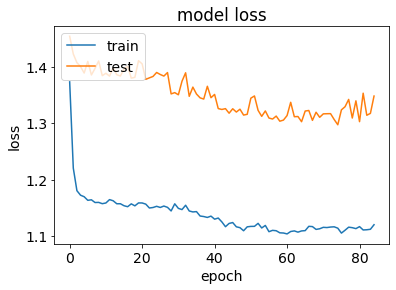

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
1.5141, 1.3675, 1.2827, 1.2074, 1.1523, 1.1161
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
4.4040, 4.1731, 4.1006, 4.0440, 4.0280, 4.0316
Transformer training time = 1445.76318
T prediction time = 0.00047


In [117]:

# for gamma in gammas:
gat_features = np.load(base_path.format('RT_{}_GAT_combine_{}_{}.npy'.format(percent, dim, gamma)))

gat_features = gat_features.reshape(9, 142+4500, 128)

print(gat_features.shape)

a=time.time()
# X_train, Y_train, X_pred = transformer_inputs(gat_features, data_train[:,:,63]) #4+1 #8+1 #16+1

train_time = time.time() - a
print("Time taken for generating input for transformer inputs = {}".format(train_time))

xt = copy.deepcopy(X_train[:,:,:])
xt = np.transpose(xt, axes=(0,1,2))

xp = copy.deepcopy(X_pred[:,:,:])
xp = np.transpose(xp, axes=(0,1,2))

print(xt.shape, xp.shape)

loss_obj = Utility(0.5)

overall_pred = copy.deepcopy(data_train)
transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

print("Transformer training time = {:.5f}".format(t_train_time))
print("T prediction time = {:.5f}".format(t_pred_time))

In [13]:
#icsoc
import warnings
import scipy.sparse as sp
import time

def degree_power(A, k):    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        degrees = np.power(np.array(A.sum(1)), k).ravel()       
    degrees[np.isinf(degrees)] = 0.0
    if sp.issparse(A):
        D = sp.diags(degrees)
    else:
        D = np.diag(degrees)
    return D

# def normalized_adjacency(adj_indicator):
#     normalized_D = degree_power(adj_indicator, -0.5) 
#     norm_adj = normalized_D.dot(adj_indicator).dot(normalized_D)       #D^-1/2.A. D^-1/2
#     return np.identity(adj_indicator.shape[0]) + norm_adj              # I+A_hat

def normalized_adjacency(Indicator_mat, Adj):
    normalized_D = degree_power(Indicator_mat, -0.5)
    return normalized_D.dot(Adj).dot(normalized_D)

def adj_calculation(temp):
    G = nx.Graph()

    edge_list = []

    train_data_indicator = np.zeros((temp.shape[0], temp.shape[1]))

    for i in range(data_train.shape[0]):
        for j in range(data_train.shape[1]):
            edge_list.append(('U_' + str(i),'S_' + str(j), temp[i][j]))
            if temp[i][j] !=0:
                train_data_indicator[i][j] = 1

    G.add_weighted_edges_from(edge_list) #graph

    adj_mat = nx.to_numpy_array(G)
    adj_indicator = np.zeros((adj_mat.shape))

    for i in range(adj_mat.shape[0]):
        for j in range(adj_mat.shape[1]):
            if adj_mat[i][j] !=0:
                adj_indicator[i][j] = 1

    adj_norm = normalized_adjacency(adj_indicator, adj_mat)
    return adj_norm

class GConv(Layer):
    def __init__(self, adj, units=32, activation=None):
        super(GConv, self).__init__()
        self.adj = adj
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        self.w1 = self.add_weight(shape=(input_shape[-1], 155),initializer="random_normal",trainable=True,)
        self.w2 = self.add_weight(shape=(155, 155),initializer="random_normal", trainable=True,)
        self.b1 = self.add_weight(shape=(155,), initializer="random_normal", trainable=True)
        self.b2 = self.add_weight(shape=(155,), initializer="random_normal", trainable=True)
        
    def call(self, inputs):
        embedding = self.activation(inputs + self.adj @ inputs @ self.w1 + self.b1) #graph conv
#         embedding = self.activation(self.adj @ inputs @ self.w1 + self.b1) #graph conv
        #embedding = self.activation(inputs @ self.w1 + self.b1)
        mlp_embedding = self.activation(embedding @ self.w2 + self.b2)      #dense mlp
        return mlp_embedding

(63900, 9, 620) (575100, 9, 620)
(9, 620)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 9, 620)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_8 (MultiHe (None, 9, 620)       2543212     input_3[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.add_16 (TFOpLa (None, 9, 620)       0           multi_head_attention_8[0][0]     
                                                                 input_3[0][0]                    
__________________________________________________

Epoch 1/200
1598/1598 [==============================] - 25s 14ms/step - loss: 0.8968 - mae: 2.1700 - val_loss: 0.9999 - val_mae: 2.4374
Epoch 2/200
1598/1598 [==============================] - 23s 14ms/step - loss: 0.8329 - mae: 2.0831 - val_loss: 0.9594 - val_mae: 2.3363
Epoch 3/200
1598/1598 [==============================] - 23s 14ms/step - loss: 0.8220 - mae: 2.0553 - val_loss: 0.9964 - val_mae: 2.4334
Epoch 4/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.8203 - mae: 2.0532 - val_loss: 0.9901 - val_mae: 2.3982
Epoch 5/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.8199 - mae: 2.0528 - val_loss: 1.0024 - val_mae: 2.4289
Epoch 6/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.8185 - mae: 2.0503 - val_loss: 0.9919 - val_mae: 2.3963
Epoch 7/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.8142 - mae: 2.0393 - val_loss: 0.9960 - val_mae: 2.3941
Epoch 8/200
1598/1598 [==================

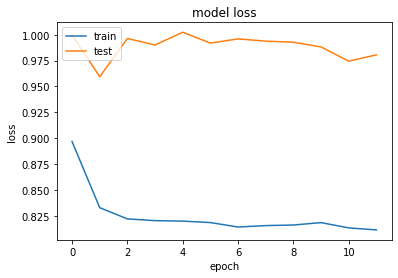

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
1.8049, 1.6211, 1.5247, 1.4476, 1.4081, 1.3886
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
4.9621, 4.6961, 4.6280, 4.5860, 4.6008, 4.6327
Transformer training time = 279.6178
T prediction time = 0.0007
(9, 620)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 9, 620)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_12 (MultiH (None, 9, 620)       2543212     input_4[0][0]                    
                                                                 input_4[0][0]                    
______________________________________________________________________________________

Epoch 1/200
1598/1598 [==============================] - 25s 14ms/step - loss: 0.2659 - mae: 2.2305 - val_loss: 0.2921 - val_mae: 2.2909
Epoch 2/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2582 - mae: 2.1592 - val_loss: 0.3097 - val_mae: 2.4277
Epoch 3/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2550 - mae: 2.1137 - val_loss: 0.3062 - val_mae: 2.3707
Epoch 4/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2514 - mae: 2.0856 - val_loss: 0.2960 - val_mae: 2.2924
Epoch 5/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2468 - mae: 2.0347 - val_loss: 0.2980 - val_mae: 2.3178
Epoch 6/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2474 - mae: 2.0450 - val_loss: 0.3022 - val_mae: 2.3382
Epoch 7/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.2488 - mae: 2.0646 - val_loss: 0.2952 - val_mae: 2.2833
Epoch 8/200
1598/1598 [==================

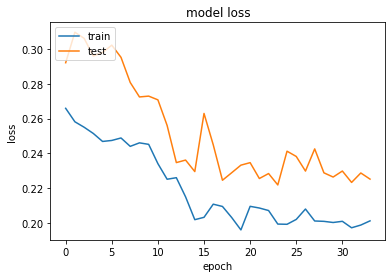

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
1.4204, 1.2587, 1.1541, 1.0686, 1.0162, 0.9827
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
3.7809, 3.4749, 3.3483, 3.2554, 3.2276, 3.2200
Transformer training time = 768.1588
T prediction time = 0.0008
(9, 620)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 9, 620)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_16 (MultiH (None, 9, 620)       2543212     input_5[0][0]                    
                                                                 input_5[0][0]                    
______________________________________________________________________________________

Epoch 1/200
1598/1598 [==============================] - 24s 14ms/step - loss: 0.0824 - mae: 1.7783 - val_loss: 0.0678 - val_mae: 1.5008
Epoch 2/200
1598/1598 [==============================] - 22s 14ms/step - loss: 0.0597 - mae: 1.3996 - val_loss: 0.0662 - val_mae: 1.3920
Epoch 3/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.0552 - mae: 1.3042 - val_loss: 0.0582 - val_mae: 1.4111
Epoch 4/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.0522 - mae: 1.2486 - val_loss: 0.0570 - val_mae: 1.3414
Epoch 5/200
1598/1598 [==============================] - 24s 15ms/step - loss: 0.0528 - mae: 1.2597 - val_loss: 0.0564 - val_mae: 1.3257
Epoch 6/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.0526 - mae: 1.2566 - val_loss: 0.0592 - val_mae: 1.2567
Epoch 7/200
1598/1598 [==============================] - 23s 15ms/step - loss: 0.0535 - mae: 1.2595 - val_loss: 0.0655 - val_mae: 1.5773
Epoch 8/200
1598/1598 [==================

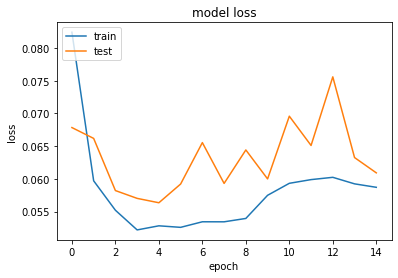

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
1.1045, 1.0113, 0.9604, 0.9145, 0.8798, 0.8549
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.8001, 2.6143, 2.5499, 2.4974, 2.4730, 2.4598
Transformer training time = 350.9389
T prediction time = 0.0007
(9, 620)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 9, 620)]     0                                            
__________________________________________________________________________________________________
multi_head_attention_20 (MultiH (None, 9, 620)       2543212     input_6[0][0]                    
                                                                 input_6[0][0]                    
______________________________________________________________________________________

Epoch 1/200
1598/1598 [==============================] - 26s 15ms/step - loss: 0.0014 - mae: 1.9932 - val_loss: 0.0012 - val_mae: 1.7970
Epoch 2/200
1598/1598 [==============================] - 23s 14ms/step - loss: 9.5712e-04 - mae: 1.5327 - val_loss: 0.0011 - val_mae: 1.5246
Epoch 3/200
1598/1598 [==============================] - 23s 14ms/step - loss: 8.7850e-04 - mae: 1.4374 - val_loss: 0.0011 - val_mae: 1.5638
Epoch 4/200
1598/1598 [==============================] - 23s 15ms/step - loss: 8.4821e-04 - mae: 1.3923 - val_loss: 9.5070e-04 - val_mae: 1.2779
Epoch 5/200
1598/1598 [==============================] - 23s 15ms/step - loss: 8.0938e-04 - mae: 1.3386 - val_loss: 9.0464e-04 - val_mae: 1.3260
Epoch 6/200
1598/1598 [==============================] - 23s 15ms/step - loss: 8.0551e-04 - mae: 1.3307 - val_loss: 9.1699e-04 - val_mae: 1.2904
Epoch 7/200
1598/1598 [==============================] - 23s 15ms/step - loss: 7.8808e-04 - mae: 1.3110 - val_loss: 9.0689e-04 - val_mae: 1.2292
E

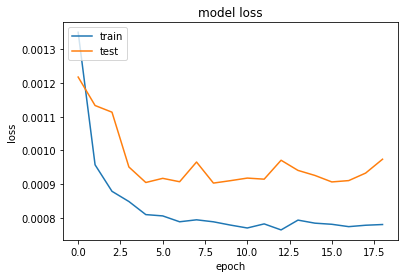

Time-stamp =  63
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
0.9405, 0.8464, 0.7923, 0.7436, 0.7047, 0.6751
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 
2.6936, 2.5035, 2.4329, 2.3748, 2.3452, 2.3282
Transformer training time = 444.9684
T prediction time = 0.0008


In [19]:
# gammas = [5]

for gamma in gammas:
    loss_fn = Custom_Loss(gamma)
    gcn_features = []
#     print("Dimension for the NMF = ", dim)
    print("For gamma = ", gamma)

    for k in tqdm_notebook(range(55,64)):  #4: 55-64  #8: 48-64  #16: 32-64
        temp = temp_train[:,:,k]
        a = time.time()
        csm_user, csm_serv = similarity_feature(temp)
        csm_user = user_train_and_test(csm_user)
        csm_serv = serv_train_and_test(csm_serv)
        csm_feature = np.concatenate((csm_user, csm_serv), axis=0)

#         u_euclid, s_euclid = euclidean_dist(temp)    
#         u_euclid = user_train_and_test(u_euclid)
#         s_euclid = serv_train_and_test(s_euclid)

        user_stat, serv_stat = statistical_feature(temp)
    
        user_svd, serv_svd = svd_feature(temp)
        svd_feat = np.concatenate((user_svd, serv_svd), axis=0)


#         dist_feature = np.concatenate((u_euclid, s_euclid), axis=0)
        stat_feature = np.concatenate((user_stat, serv_stat), axis=0)

        node_feature = np.concatenate((svd_feat, csm_feature, stat_feature), axis=1)
        
#         handcrafted_features.append(node_feature)  #raw features

        node_feature = np.array(node_feature)

        ae_time = ae_time + time.time() - a

        a = time.time()

        adj_norm = adj_calculation(data_train[:,:,k])
        gcn_extracted_features, rt_pred_gconv = gcn_train_and_predict(k, loss_fn, adj_norm, node_feature, data_train[:,:,k])

        gcn_features.append(gcn_extracted_features)
        gcn_time = gcn_time + time.time() - a

gcn_features = np.array(gcn_features).reshape(len(gcn_features)*adj_norm.shape[0], 310)
np.save(base_path.format('RT_{}_GCN_icsoc_Combine_{}'.format(percent, gamma)), gcn_features)

print("AE Training time:{}\nGCN training time:{:.4f}".format(ae_time,gcn_time))
    
# for gamma in gammas:
gcn_features = np.load(base_path.format('RT_{}_GCN_icsoc_Combine_{}.npy'.format(percent, gamma)))

gcn_features = gcn_features.reshape(9, 142+4500, 310)

print(gcn_features.shape)

a=time.time()
X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

# X_train, Y_train, X_pred = transformer_inputs(handcrafted_features, data_train[:,:,63]) #4+1 #8+1 #16+1
train_time = time.time() - a
print("Time taken for generating input for transformer inputs = {:.4f}".format(train_time))

xt = copy.deepcopy(X_train[:,:,:])
xt = np.transpose(xt, axes=(0,1,2))

xp = copy.deepcopy(X_pred[:,:,:])
xp = np.transpose(xp, axes=(0,1,2))

print(xt.shape, xp.shape)

loss_obj = Utility(0.5)

overall_pred = copy.deepcopy(data_train)
transf_model, t_train_time = transformer_train(63, loss_obj, xt, Y_train)

overall_pred[:,:,-1], t_pred_time = transformer_predict(transf_model, 63, xp)

print("Transformer training time = {:.4f}".format(t_train_time))
print("T prediction time = {:.4f}".format(t_pred_time))

In [ ]:
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.0581, 0.9627, 0.9104, 0.8646, 0.8322, 0.8092
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.0335, 2.8522, 2.7942, 2.7480, 2.7318, 2.7264

In [25]:
# GCN prediction:0.00474095344543457
# non-zero count =  456208 463867.0
# non-zero count =  448873 456520.0
# non-zero count =  440418 448055.0
# non-zero count =  432108 439737.0
# non-zero count =  423855 431478.0
# non-zero count =  415215 422823.0
# Time-stamp =  56
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2710, 1.1837, 1.1190, 1.0660, 1.0325, 1.0080
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.6835, 3.5419, 3.4832, 3.4394, 3.4232, 3.4193
# GCN prediction:0.004669666290283203
# non-zero count =  456668 463568.0
# non-zero count =  448387 455274.0
# non-zero count =  439182 446058.0
# non-zero count =  429536 436406.0
# non-zero count =  419902 426768.0
# non-zero count =  410182 417035.0
# Time-stamp =  57
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2441, 1.1453, 1.0791, 1.0198, 0.9800, 0.9526
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4540, 3.2795, 3.2094, 3.1511, 3.1299, 3.1183
# GCN prediction:0.0046427249908447266
# non-zero count =  456398 463664.0
# non-zero count =  447863 455118.0
# non-zero count =  439447 446692.0
# non-zero count =  430824 438060.0
# non-zero count =  422103 429334.0
# non-zero count =  413511 420730.0
# Time-stamp =  58
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2449, 1.1375, 1.0704, 1.0141, 0.9755, 0.9488
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.6119, 3.4197, 3.3415, 3.2829, 3.2626, 3.2481
# GCN prediction:0.004606962203979492
# non-zero count =  456764 463623.0
# non-zero count =  448705 455552.0
# non-zero count =  440019 446858.0
# non-zero count =  431292 438123.0
# non-zero count =  422568 429391.0
# non-zero count =  413817 420630.0
# Time-stamp =  59
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1895, 1.0956, 1.0341, 0.9817, 0.9468, 0.9226
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.6465, 3.4928, 3.4195, 3.3622, 3.3462, 3.3484
# GCN prediction:0.004676103591918945
# non-zero count =  456021 463250.0
# non-zero count =  447387 454605.0
# non-zero count =  438876 446086.0
# non-zero count =  430473 437672.0
# non-zero count =  421572 428763.0
# non-zero count =  412806 419987.0
# Time-stamp =  60
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2379, 1.1265, 1.0650, 1.0136, 0.9762, 0.9502
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.5237, 3.3181, 3.2512, 3.1956, 3.1730, 3.1589
# GCN prediction:0.0047762393951416016
# non-zero count =  455265 462235.0
# non-zero count =  445999 452959.0
# non-zero count =  437342 444294.0
# non-zero count =  428569 435507.0
# non-zero count =  419097 426030.0
# non-zero count =  410159 417079.0
# Time-stamp =  61
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2672, 1.1475, 1.0800, 1.0220, 0.9808, 0.9545
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.6215, 3.4096, 3.3343, 3.2650, 3.2370, 3.2212
# GCN prediction:0.004557609558105469
# non-zero count =  452928 459863.0
# non-zero count =  444024 450951.0
# non-zero count =  434869 441783.0
# non-zero count =  426044 432950.0
# non-zero count =  417211 424107.0
# non-zero count =  408535 415420.0
# Time-stamp =  62
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.2162, 1.1044, 1.0386, 0.9833, 0.9449, 0.9187
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.4344, 3.2315, 3.1599, 3.1029, 3.0818, 3.0725
# GCN prediction:0.0045888423919677734
# non-zero count =  429964 433980.0
# non-zero count =  421501 425503.0
# non-zero count =  413419 417407.0
# non-zero count =  405400 409374.0
# non-zero count =  396918 400878.0
# non-zero count =  388445 392399.0
# Time-stamp =  63
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 1.1747, 1.0582, 0.9941, 0.9359, 0.8944, 0.8655
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.7690, 3.5665, 3.5089, 3.3582, 3.3316, 3.3230
# AE Training time:507.07253885269165
# GCN training time:542.5360083580017
# Time taken for transformer training and prediction = 558.3455545902252, 0.0003216691299886874

In [64]:
# for k in tqdm_notebook(range(47, 64)):
#     a = time.time()
#     X_train, Y_train, X_pred = transformer_inputs(gcn_features[index:index+17], data_train[:,:,k]) #4+1 #8+1 #16+1
#     index += 1
#     train_time = time.time() - a
#     overall_pred[:,:,k], t_train_time, t_pred_time = transformer_train_and_test(k, X_train, Y_train, X_pred)
#     print("Time taken for train and prediction = {}, {}".format(train_time + t_train_time, t_pred_time))

# for dim in nmf_dim:

# dim = 150
# gamma = 5

# # gcn_features = np.load(base_path.format('RT_{}_GCN_combine_NMF_{}_{}.npy'.format(percent, dim, gamma)))
# gcn_features = np.load(base_path.format('RT_{}_GCN_CSM_{}.npy'.format(percent, gamma)))

# gcn_features = gcn_features.reshape(9, adj_norm.shape[0], 128)

# a=time.time()
# X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1

# # X_train, Y_train, X_pred = transformer_inputs(handcrafted_features, data_train[:,:,63]) #4+1 #8+1 #16+1
# train_time = time.time() - a
# print("Time taken for generating input for transformer inputs = {}".format(train_time))

(9, 142, 128) (9, 4500, 128) (142, 4500)


  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2915.185751438141


In [65]:
# X_train = np.load(base_path.format('X_train_all64_with_adj_{}.npy'.format(percent)))
# Y_train = np.load(base_path.format('Y_train_all64_with_adj_{}.npy'.format(percent)))
# X_pred = np.load(base_path.format('X_pred_all64_with_adj_{}.npy'.format(percent)))
# X_train.shape, Y_train.shape, X_pred.shape

In [66]:
# np.save(base_path.format('X_train_8time_raw_rt_{}'.format(percent)), X_train)
# np.save(base_path.format('Y_train_8time_raw_rt_{}'.format(percent)), Y_train)
# np.save(base_path.format('X_pred_8time_raw_rt_{}'.format(percent)), X_pred)

# X_train = np.load(base_path.format('X_train_8time_raw_rt_{}.npy'.format(percent)))
# Y_train = np.load(base_path.format('Y_train_8time_raw_rt_{}.npy'.format(percent)))
# X_pred = np.load(base_path.format('X_pred_8time_raw_rt_{}.npy'.format(percent)))
# X_train.shape, Y_train.shape, X_pred.shape

In [31]:
# headsize-128
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.854, 0.748, 0.691, 0.640, 0.604, 0.580
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.823, 2.620, 2.549, 2.491, 2.468, 2.458

In [32]:
#8timestamp-((63900, 256, 8), (575100, 256, 8))---58epoch--22k parameters
# head_size=8,  #256
#             num_heads=4,
#             ff_dim=4,   #64
#             num_transformer_blocks=4,
#             mlp_units=[64],  #128,16
#             mlp_dropout=0.4,
#             dropout=0.4,
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.852, 0.749, 0.688, 0.633, 0.592, 0.563
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.864, 2.668, 2.591, 2.524, 2.491, 2.470

In [33]:
overall_pred = copy.deepcopy(data_train)
overall_pred[:,:,-1], t_train_time, t_pred_time = transformer_train_and_test(63, X_train[:,32:,:], Y_train, X_pred[:,32:,:])
print("Time taken for transformer training and prediction = {}, {}".format(t_train_time, t_pred_time))

NameError: name 'transformer_train_and_test' is not defined

In [ ]:
#5
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.915, 0.814, 0.748, 0.688, 0.642, 0.608
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.880, 2.682, 2.592, 2.518, 2.480, 2.459

#10
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.863, 0.760, 0.700, 0.647, 0.609, 0.583
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.770, 2.563, 2.488, 2.428, 2.402, 2.390

In [126]:
k=-1
mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], overall_pred[:,:,-1])
mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier21[:,:,k], overall_pred[:,:,-1])
mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier41[:,:,k], overall_pred[:,:,-1])
mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier61[:,:,k], overall_pred[:,:,-1])
mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier81[:,:,k], overall_pred[:,:,-1])
mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier101[:,:,k], overall_pred[:,:,-1])

print("Time-stamp = ", k)
print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.3f}, {1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}".format(mae, mae2, mae4, mae6, mae8, mae10))
print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.3f}, {1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

non-zero count =  370080 433980.0
non-zero count =  362842 425503.0
non-zero count =  355930 417407.0
non-zero count =  349082 409374.0
non-zero count =  341833 400878.0
non-zero count =  334605 392399.0
Time-stamp =  -1
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.892, 0.781, 0.715, 0.656, 0.612, 0.582
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.892, 2.663, 2.576, 2.505, 2.473, 2.458


In [79]:
percent = 10
k =-1
base_path1 = '/home/suraj/Desktop/time-aware papers/dataset2/setup1/{}'
outlier21 = np.load(base_path1.format('rt_outlier_{}.npy'.format(2)))
outlier41 = np.load(base_path1.format('rt_outlier_{}.npy'.format(4)))
outlier61 = np.load(base_path1.format('rt_outlier_{}.npy'.format(6)))
outlier81 = np.load(base_path1.format('rt_outlier_{}.npy'.format(8)))
outlier101 = np.load(base_path1.format('rt_outlier_{}.npy'.format(10)))

mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], rt_pred_gconv)
mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier21[:,:,k], rt_pred_gconv)
mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier41[:,:,k], rt_pred_gconv)
mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier61[:,:,k], rt_pred_gconv)
mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier81[:,:,k], rt_pred_gconv)
mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier101[:,:,k], rt_pred_gconv)

print("Time-stamp = ", k)
print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.3f}, {1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}".format(mae, mae2, mae4, mae6, mae8, mae10))
print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = {0:.3f}, {1:.3f}, {2:.3f}, {3:.3f}, {4:.3f}, {5:.3f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.943, 0.809, 0.727, 0.654, 0.602, 0.573
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.039, 2.770, 2.662, 2.607, 2.583, 2.580

non-zero count =  429964 433980.0
non-zero count =  421501 425503.0
non-zero count =  413419 417407.0
non-zero count =  405400 409374.0
non-zero count =  396918 400878.0
non-zero count =  388445 392399.0
Time-stamp =  -1
mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.943, 0.829, 0.763, 0.706, 0.662, 0.631
rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 3.039, 2.811, 2.728, 2.663, 2.634, 2.622


In [ ]:
for i in range(outlier21.shape[0]):
    for j in range(outlier21.shape[1]):
        for k in range(outlier21.shape[2]):
            if outlier101[i][j][k] == 0:
                print(data_org[i][j][k])

In [12]:
# np.save(base_path.format('X_train_all64_with_adj_{}'.format(percent)), X_train)
# np.save(base_path.format('Y_train_all64_with_adj_{}'.format(percent)), Y_train)
# np.save(base_path.format('X_pred_all64_with_adj_{}'.format(percent)), X_pred)

((63900, 64, 256), (63900,), (575100, 64, 256))

In [4]:
X_train.shape, Y_train.shape, X_pred.shape

((63900, 64, 256), (63900,), (575100, 64, 256))

In [ ]:
#withadj
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.865, 0.744, 0.661, 0.587, 0.537, 0.508
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.843, 2.607, 2.494, 2.428, 2.390, 2.375

#withoutadj
# mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 0.881, 0.753, 0.669, 0.598, 0.548, 0.520
# rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = 2.872, 2.618, 2.504, 2.443, 2.411, 2.400

# Time taken for train and prediction = 0.0012112340158513268, 0.00022936449986170777

In [13]:
#create lstm
def create_lstm(units, loss_obj):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(xt.shape[1], xt.shape[2])))
    model.add(Dropout(0.6)) 
    model.add(LSTM(units = int(units/2)))
    model.add(Dropout(0.4))
    model.add(Dense(1))
    model.compile(optimizer='adam', 
                  #loss='mse'
                 loss = loss_obj.custom_cauchy,
                 metrics=['mae'],)
    return model

# Create GRU model
def create_gru(units, loss_obj):
    model = Sequential()
    model.add(GRU (units = units, return_sequences = True, input_shape = [xt.shape[1], xt.shape[2]]))
    model.add(Dropout(0.6)) 
    model.add(GRU(units = int(units/2)))
    model.add(Dropout(0.4))
    model.add(Dense(units = 1)) 
    model.compile(optimizer='adam',
                  #loss='mse'
                 loss = loss_obj.custom_cauchy,
                 metrics=['mae'],)
    return model

def fit_model(model, xtrain, ytrain):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)
    history = model.fit(xtrain, ytrain, epochs = 100,  
                        validation_split = 0.20,
                        batch_size = 128, shuffle = False, 
                        callbacks = [early_stop])
    return history


def prediction(model, xp):
    prediction = model.predict(xp)
    return prediction
    
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
    

# plot_loss (history_lstm, ' LSTM')
# plot_loss (history_gru, ' GRU')

In [ ]:
row, col = data_train.shape
outlier0 = np.ones((row,col))
outlier2 = np.load(base_path.format('tp_outlier_{}.npy'.format(2)))
outlier4 = np.load(base_path.format('tp_outlier_{}.npy'.format(4)))
outlier6 = np.load(base_path.format('tp_outlier_{}.npy'.format(6)))
outlier8 = np.load(base_path.format('tp_outlier_{}.npy'.format(8)))
outlier10 = np.load(base_path.format('tp_outlier_{}.npy'.format(10)))

In [27]:
percent = [10,20,10,20]

for i in range(1, len(percent)):
    if i<2:
        print("RT ", percent[i])
        data_org = np.load(base_path.format('rtdata_full_O.npy'))
        data_org_indicator = copy.deepcopy(data_org)
        data_org_indicator[np.where(data_org_indicator>0)] = 1

        data_train = np.load(base_path.format('rtdata_{}.npy'.format(percent[i])))
        data_train_indicator = copy.deepcopy(data_train)
        data_train_indicator[np.where(data_train_indicator>0)] = 1

        outlier2 = np.load(base_path.format('rt_outlier_{}.npy'.format(2)))
        outlier4 = np.load(base_path.format('rt_outlier_{}.npy'.format(4)))
        outlier6 = np.load(base_path.format('rt_outlier_{}.npy'.format(6)))
        outlier8 = np.load(base_path.format('rt_outlier_{}.npy'.format(8)))
        outlier10 = np.load(base_path.format('rt_outlier_{}.npy'.format(10)))
        
        gcn_features = np.load(base_path.format('RT_{}_GCN_Combine_{}.npy'.format(percent[i], 5)))

        gcn_features = gcn_features.reshape(9, 142+4500, 128)

        print(gcn_features.shape)

        a=time.time()
        X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1
        
        np.save(base_path.format('RT_X_train_8_{}'.format(percent[i])), X_train)
        np.save(base_path.format('RT_Y_train_8_{}'.format(percent[i])), Y_train)
        np.save(base_path.format('RT_X_pred_8_{}'.format(percent[i])), X_pred)

        train_time = time.time() - a
        print("Time taken for generating input for transformer inputs = {}".format(train_time))

        xt = copy.deepcopy(X_train[:,:,:])
        xt = np.transpose(xt, axes=(0,1,2))

        xp = copy.deepcopy(X_pred[:,:,:])
        xp = np.transpose(xp, axes=(0,1,2))

        loss_obj = Utility(0.5)
        
        model_lstm = create_lstm(64, loss_obj)
        model_gru = create_gru(64, loss_obj)
        
        a = time.time()
        history_lstm = fit_model(model_lstm, xt, Y_train)
        print("LSTM training time:{}".format(time.time()-a))
        a = time.time()
        history_gru = fit_model(model_gru, xt, Y_train)
        print("GRU training time:{}".format(time.time()-a))
        
        with tf.device('cpu'):
            a = time.time()
            prediction_lstm = prediction(model_lstm, xp)
            print("LSTM prediction time:{}".format((time.time()-a)))
            a = time.time()
            prediction_gru = prediction(model_gru, xp)
            print("GRU prediction time:{}".format((time.time()-a)))
        
        k = -1
        pred_lstm = fill_matrix(k, prediction_lstm)

        mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], pred_lstm)
        mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], pred_lstm)
        mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], pred_lstm)
        mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], pred_lstm)
        mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], pred_lstm)
        mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], pred_lstm)

        print("Time-stamp = ", k)
        print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
        print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

        pred_gru = fill_matrix(k, prediction_gru)

        mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], pred_gru)
        mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], pred_gru)
        mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], pred_gru)
        mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], pred_gru)
        mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], pred_gru)
        mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], pred_gru)

        print("Time-stamp = ", k)
        print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
        print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

    else:
        print("TP ", percent[i])
        data_org = np.load(base_path.format('tpdata_full_O.npy'))
        data_org_indicator = copy.deepcopy(data_org)
        data_org_indicator[np.where(data_org_indicator>0)] = 1

        data_train = np.load(base_path.format('tpdata_{}.npy'.format(percent[i])))
        data_train_indicator = copy.deepcopy(data_train)
        data_train_indicator[np.where(data_train_indicator>0)] = 1

        outlier2 = np.load(base_path.format('tp_outlier_{}.npy'.format(2)))
        outlier4 = np.load(base_path.format('tp_outlier_{}.npy'.format(4)))
        outlier6 = np.load(base_path.format('tp_outlier_{}.npy'.format(6)))
        outlier8 = np.load(base_path.format('tp_outlier_{}.npy'.format(8)))
        outlier10 = np.load(base_path.format('tp_outlier_{}.npy'.format(10)))
        
        gcn_features = np.load(base_path.format('TP_{}_GCN_Combine_{}.npy'.format(percent[i], 5)))
        
        gcn_features = gcn_features.reshape(9, 142+4500, 128)

        print(gcn_features.shape)

        a=time.time()
        X_train, Y_train, X_pred = transformer_inputs(gcn_features, data_train[:,:,63]) #4+1 #8+1 #16+1
        
        np.save(base_path.format('TP_X_train_8_{}'.format(percent[i])), X_train)
        np.save(base_path.format('TP_Y_train_8_{}'.format(percent[i])), Y_train)
        np.save(base_path.format('TP_X_pred_8_{}'.format(percent[i])), X_pred)

        train_time = time.time() - a
        print("Time taken for generating input for transformer inputs = {}".format(train_time))

        xt = copy.deepcopy(X_train[:,:,:])
        xt = np.transpose(xt, axes=(0,1,2))

        xp = copy.deepcopy(X_pred[:,:,:])
        xp = np.transpose(xp, axes=(0,1,2))

        loss_obj = Utility(1)
        
        model_lstm = create_lstm(64, loss_obj)
        model_gru = create_gru(64, loss_obj)
        
        a = time.time()
        history_lstm = fit_model(model_lstm, xt, Y_train)
        print("LSTM training time:{}".format(time.time()-a))
        a = time.time()
        history_gru = fit_model(model_gru, xt, Y_train)
        print("GRU training time:{}".format(time.time()-a))
        
        with tf.device('cpu'):
            a = time.time()
            prediction_lstm = prediction(model_lstm, xp)
            print("LSTM prediction time:{}".format((time.time()-a)))
            a = time.time()
            prediction_gru = prediction(model_gru, xp)
            print("GRU prediction time:{}".format((time.time()-a)))
        
            k = -1
            pred_lstm = fill_matrix(k, prediction_lstm)

            mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], pred_lstm)
            mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], pred_lstm)
            mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], pred_lstm)
            mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], pred_lstm)
            mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], pred_lstm)
            mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], pred_lstm)

            print("Time-stamp = ", k)
            print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
            print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

            pred_gru = fill_matrix(k, prediction_gru)

            mae, rmse, count = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], no_outlier[:,:,k], pred_gru)
            mae2, rmse2, count2 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier2[:,:,k], pred_gru)
            mae4, rmse4, count4 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier4[:,:,k], pred_gru)
            mae6, rmse6, count6 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier6[:,:,k], pred_gru)
            mae8, rmse8, count8 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier8[:,:,k], pred_gru)
            mae10, rmse10, count10 = cal_metric(data_org[:,:,k], data_org_indicator[:,:,k], outlier10[:,:,k], pred_gru)

            print("Time-stamp = ", k)
            print("mae Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(mae, mae2, mae4, mae6, mae8, mae10))
            print("rmse Gconv with removing 0%, 2%, 4%, 6%, 8%, 10% outlier = \n{0:.4f}, {1:.4f}, {2:.4f}, {3:.4f}, {4:.4f}, {5:.4f}".format(rmse, rmse2, rmse4, rmse6, rmse8, rmse10))

RT  20
(9, 4642, 128)
(9, 142, 128) (9, 4500, 128) (142, 4500)


  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2797.242818593979
Epoch 1/100
799/799 [==============================] - 4s 4ms/step - loss: 1.1663 - mae: 1.8557 - val_loss: 1.4391 - val_mae: 2.0804
Epoch 2/100
799/799 [==============================] - 2s 3ms/step - loss: 1.0440 - mae: 1.4520 - val_loss: 1.2169 - val_mae: 1.5981
Epoch 3/100
799/799 [==============================] - 2s 3ms/step - loss: 0.9569 - mae: 1.2128 - val_loss: 1.0603 - val_mae: 1.3073
Epoch 4/100
799/799 [==============================] - 2s 3ms/step - loss: 0.8707 - mae: 1.0497 - val_loss: 0.8891 - val_mae: 1.0470
Epoch 5/100
799/799 [==============================] - 2s 3ms/step - loss: 0.8486 - mae: 1.0181 - val_loss: 0.9538 - val_mae: 1.1593
Epoch 6/100
799/799 [==============================] - 2s 3ms/step - loss: 0.8299 - mae: 0.9900 - val_loss: 0.9535 - val_mae: 1.1296
Epoch 7/100
799/799 [==============================] - 2s 3ms/step - loss: 0.8293 - mae: 0.9838 - val_loss: 0.9352 - val_mae: 1

  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2782.4084610939026
Epoch 1/100
400/400 [==============================] - 3s 4ms/step - loss: 1.8470 - mae: 12.2660 - val_loss: 1.7083 - val_mae: 10.8561
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 1.7197 - mae: 11.7635 - val_loss: 1.6732 - val_mae: 10.7103
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6640 - mae: 11.5422 - val_loss: 1.5305 - val_mae: 10.3541
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 1.6267 - mae: 11.3553 - val_loss: 1.4758 - val_mae: 10.1036
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 1.5940 - mae: 11.1678 - val_loss: 1.4709 - val_mae: 10.0111
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 1.5581 - mae: 10.9791 - val_loss: 1.3873 - val_mae: 9.7181
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 1.5431 - mae: 10.8411 - val_loss: 1.3738

  0%|          | 0/142 [00:00<?, ?it/s]

Time taken for generating input for transformer inputs = 2772.8081500530243
Epoch 1/100
799/799 [==============================] - 4s 4ms/step - loss: 1.7993 - mae: 12.3638 - val_loss: 1.6546 - val_mae: 10.0974
Epoch 2/100
799/799 [==============================] - 2s 3ms/step - loss: 1.6399 - mae: 11.7270 - val_loss: 1.5846 - val_mae: 9.8389
Epoch 3/100
799/799 [==============================] - 2s 3ms/step - loss: 1.5843 - mae: 11.4196 - val_loss: 1.5263 - val_mae: 9.5743
Epoch 4/100
799/799 [==============================] - 2s 3ms/step - loss: 1.5292 - mae: 11.1138 - val_loss: 1.4577 - val_mae: 9.3076
Epoch 5/100
799/799 [==============================] - 2s 3ms/step - loss: 1.5120 - mae: 10.8810 - val_loss: 1.4686 - val_mae: 8.9815
Epoch 6/100
799/799 [==============================] - 2s 3ms/step - loss: 1.4791 - mae: 10.6427 - val_loss: 1.3936 - val_mae: 8.6895
Epoch 7/100
799/799 [==============================] - 2s 3ms/step - loss: 1.4530 - mae: 10.4544 - val_loss: 1.4101 - v

In [ ]:
# Shuffle true
# mae lstm = 1.240653577493071
# mae gru = 1.4031157991530614
# mae bilstm = 1.41550111525852

# Shuffle false
# mae lstm = 1.3290537841662833
# mae gru = 1.508695132622638
# mae bilstm = 1.2999528746916533